# **SA on TINTIN Corpus: Data Analysis**

## **Team**

In [1]:
import pandas as pd # importing pandas library

In [2]:
df_region_sample = pd.read_csv('/Users/zhouxiaoyu/desktop/tintin/region_sample.csv')

In [3]:
!pip install statsmodels # Install the statsmodels library

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.formula.api import ols

# Rename columns to simpler names
df_region_sample_renamed = df_region_sample.rename(columns={'Annotator': 'Emotions', 'Valence#': 'Valence', 'Arousal#': 'Arousal'})

# Filter for specific annotators
specific_people = df_region_sample_renamed[df_region_sample_renamed['Emotions'].isin(['JW', 'JB', 'LZ', 'SD', 'XZ'])]

# Perform ANOVA for Valence
valence_model = ols('Valence ~ C(Emotions)', data=specific_people).fit()
valence_anova_table = sm.stats.anova_lm(valence_model, typ=2)

# Perform ANOVA for Arousal
arousal_model = ols('Arousal ~ C(Emotions)', data=specific_people).fit()
arousal_anova_table = sm.stats.anova_lm(arousal_model, typ=2)

# Print the ANOVA tables
print("ANOVA for Valence")
print(valence_anova_table)
print("\nANOVA for Arousal")
print(arousal_anova_table)

ANOVA for Valence
                  sum_sq       df          F        PR(>F)
C(Emotions)    33.497190      4.0  23.024674  5.270842e-19
Residual     6616.970773  18193.0        NaN           NaN

ANOVA for Arousal
                   sum_sq       df           F         PR(>F)
C(Emotions)   1173.818193      4.0  293.567114  4.411152e-245
Residual     18186.024043  18193.0         NaN            NaN


In [5]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Rename columns to simpler names
df_region_sample_renamed = df_region_sample.rename(columns={'Annotator': 'Emotions', 'Valence#': 'Valence', 'Arousal#': 'Arousal'})

# Filter for specific annotators
specific_people = df_region_sample_renamed[df_region_sample_renamed['Emotions'].isin(['JW', 'JB', 'LZ', 'SD', 'XZ'])]

# Perform Tukey's HSD test for Valence
tukey_valence = pairwise_tukeyhsd(endog=specific_people['Valence'], 
                                  groups=specific_people['Emotions'], 
                                  alpha=0.05)
print("Tukey's HSD test for Valence")
print(tukey_valence)

# Perform Tukey's HSD test for Arousal
tukey_arousal = pairwise_tukeyhsd(endog=specific_people['Arousal'], 
                                  groups=specific_people['Emotions'], 
                                  alpha=0.05)
print("\nTukey's HSD test for Arousal")
print(tukey_arousal)

Tukey's HSD test for Valence
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    JB     JW  -0.0335 0.2576 -0.0787  0.0118  False
    JB     LZ   0.0773    0.0  0.0349  0.1197   True
    JB     SD   0.0359 0.1087 -0.0045  0.0762  False
    JB     XZ   -0.041 0.0097 -0.0752 -0.0067   True
    JW     LZ   0.1108    0.0  0.0628  0.1588   True
    JW     SD   0.0693 0.0004  0.0231  0.1155   True
    JW     XZ  -0.0075 0.9875 -0.0484  0.0335  False
    LZ     SD  -0.0414 0.0694 -0.0848  0.0019  False
    LZ     XZ  -0.1182    0.0  -0.156 -0.0805   True
    SD     XZ  -0.0768    0.0 -0.1122 -0.0414   True
----------------------------------------------------

Tukey's HSD test for Arousal
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    JB     JW   0.3707    0.0  0.2957  0

In [6]:
!pip install scikit-posthocs

In [7]:
pip install ruptures

Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install cliffs_delta

In [9]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


## **Average Arousal and Valence**

In [10]:
print(df_region_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23976 entries, 0 to 23975
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Project ID             23976 non-null  int64  
 1   Project Name           23976 non-null  object 
 2   Document Name          23976 non-null  object 
 3   Global Region          23976 non-null  object 
 4   RegionSimplified       23976 non-null  object 
 5   Country                23976 non-null  object 
 6   Document Name.1        23976 non-null  object 
 7   Publication Date       23976 non-null  int64  
 8   Publisher              22072 non-null  object 
 9   Format                 23976 non-null  object 
 10  CountryLang            23976 non-null  object 
 11  LanguageFinal          23976 non-null  object 
 12  Silent?                6043 non-null   object 
 13  Genre Simplified       23188 non-null  object 
 14  StyleDetail            23976 non-null  object 
 15  St

In [11]:
# Calculate the average Arousal and Valence# for each RegionSimplified and round to two decimal places
average_values = df_region_sample.groupby('RegionSimplified')[['Arousal', 'Valence#']].mean().round(2)

# Display the result
print(average_values)

                   Arousal  Valence#
RegionSimplified                    
Africa                2.46     -0.25
East Asia             2.60     -0.24
Europe                2.31     -0.22
South America         2.65     -0.19
SouthCentral Asia     2.33     -0.15
West Asia             2.43     -0.18


In [12]:
import pandas as pd
from scipy.stats import f_oneway

# Calculate ANOVA for Arousal
arousal_groups = [group['Arousal'].values for name, group in df_region_sample.groupby('RegionSimplified')]
arousal_anova_result = f_oneway(*arousal_groups)

# Calculate ANOVA for Valence#
valence_groups = [group['Valence#'].values for name, group in df_region_sample.groupby('RegionSimplified')]
valence_anova_result = f_oneway(*valence_groups)

# Calculate partial eta squared for Arousal
arousal_between_group_var = sum([(len(group) * (group.mean() - df_region_sample['Arousal'].mean())**2) for group in arousal_groups])
arousal_total_var = sum([(x - df_region_sample['Arousal'].mean())**2 for x in df_region_sample['Arousal']])
arousal_eta_squared = arousal_between_group_var / arousal_total_var

# Calculate partial eta squared for Valence#
valence_between_group_var = sum([(len(group) * (group.mean() - df_region_sample['Valence#'].mean())**2) for group in valence_groups])
valence_total_var = sum([(x - df_region_sample['Valence#'].mean())**2 for x in df_region_sample['Valence#']])
valence_eta_squared = valence_between_group_var / valence_total_var

# Display the ANOVA results with η²
print("ANOVA test result for Arousal:")
print(f"F-statistic: {arousal_anova_result.statistic:.2f}, p-value: {arousal_anova_result.pvalue:.4f}, η² = {arousal_eta_squared:.2f}")

print("\nANOVA test result for Valence#:")
print(f"F-statistic: {valence_anova_result.statistic:.2f}, p-value: {valence_anova_result.pvalue:.4f}, η² = {valence_eta_squared:.2f}")

ANOVA test result for Arousal:
F-statistic: 78.69, p-value: 0.0000, η² = 0.02

ANOVA test result for Valence#:
F-statistic: 15.12, p-value: 0.0000, η² = 0.00


## **Arousal Arc**

Mean Calculated from SMA Values


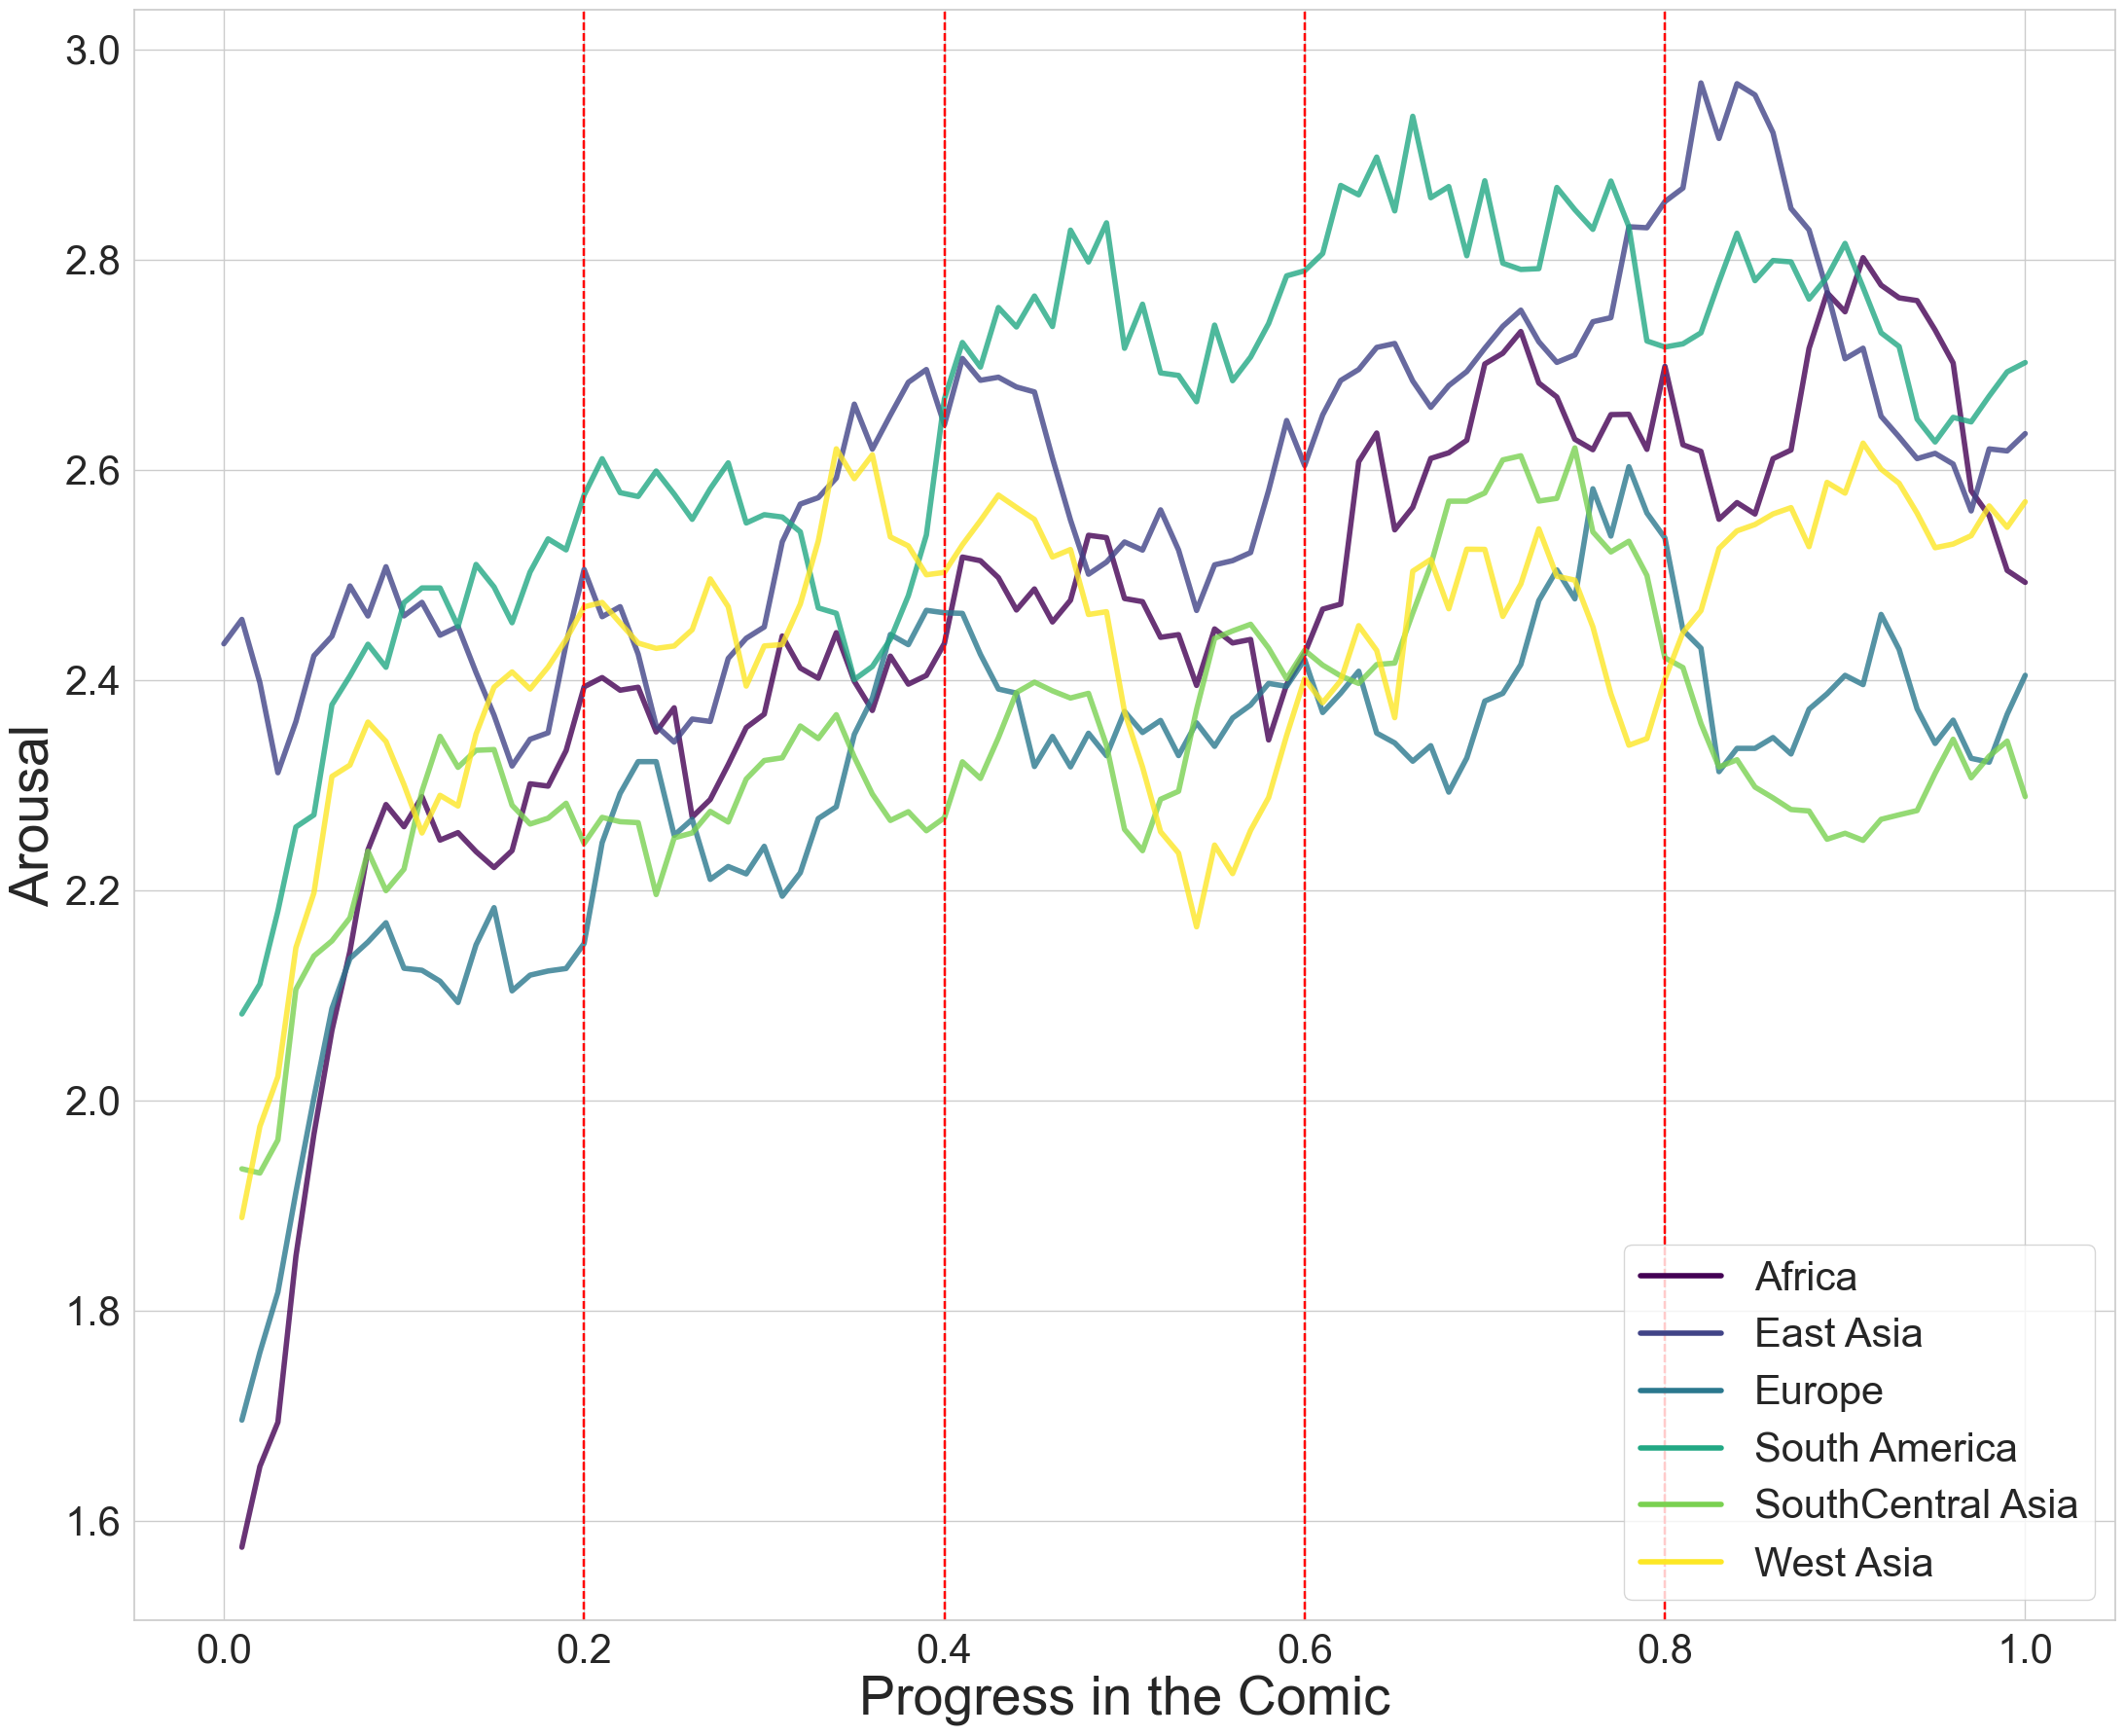

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from matplotlib.lines import Line2D

# Set plot style
sns.set(style="whitegrid")

# Use a colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
colors = [cmap(i / 5) for i in range(6)]
region_colors = {
    'Africa': colors[0],
    'East Asia': colors[1],
    'Europe': colors[2],
    'South America': colors[3],
    'SouthCentral Asia': colors[4],
    'West Asia': colors[5]
}

def calculate_metrics(data, value_col, index_col, window):
    
    mean_arousal_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_arousal_by_panel['Arousal_SMA'] = mean_arousal_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    return mean_arousal_by_panel

# Define the rolling window size
window = 5

# Create plot
fig, ax2 = plt.subplots(figsize=(22, 18))

print("Mean Calculated from SMA Values")

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_arousal_by_panel = calculate_metrics(region_data, 'Arousal', 'OrdinalPanel%Rounded2', window)
    
    # Plot SMA line
    ax2.plot(mean_arousal_by_panel['OrdinalPanel%Rounded2'], mean_arousal_by_panel['Arousal_SMA'], color=color, linewidth=4, label=f'{region} SMA (window={window})', alpha=0.8)

    # Split data into 5 segments and add dashed lines
    num_segments = 5
    segment_indices = np.array_split(mean_arousal_by_panel.index, num_segments)
    segment_points = [mean_arousal_by_panel['OrdinalPanel%Rounded2'].iloc[segment[-1]] for segment in segment_indices]

    for sp in segment_points[:-1]:  # Ignore the last split point as it's just the end
        ax2.axvline(x=sp, color='red', linestyle='--')

# Set up legend
legend_lines = [Line2D([0], [0], color=color, linewidth=4) for color in region_colors.values()]
legend_labels = [f'{region}' for region in region_colors.keys()]

ax2.legend(legend_lines, legend_labels, loc='lower right', fontsize=30, frameon=True)

ax2.set_title('', fontsize=40)
ax2.set_xlabel('Progress in the Comic', fontsize=40)
ax2.set_ylabel('Arousal', fontsize=40)

ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()


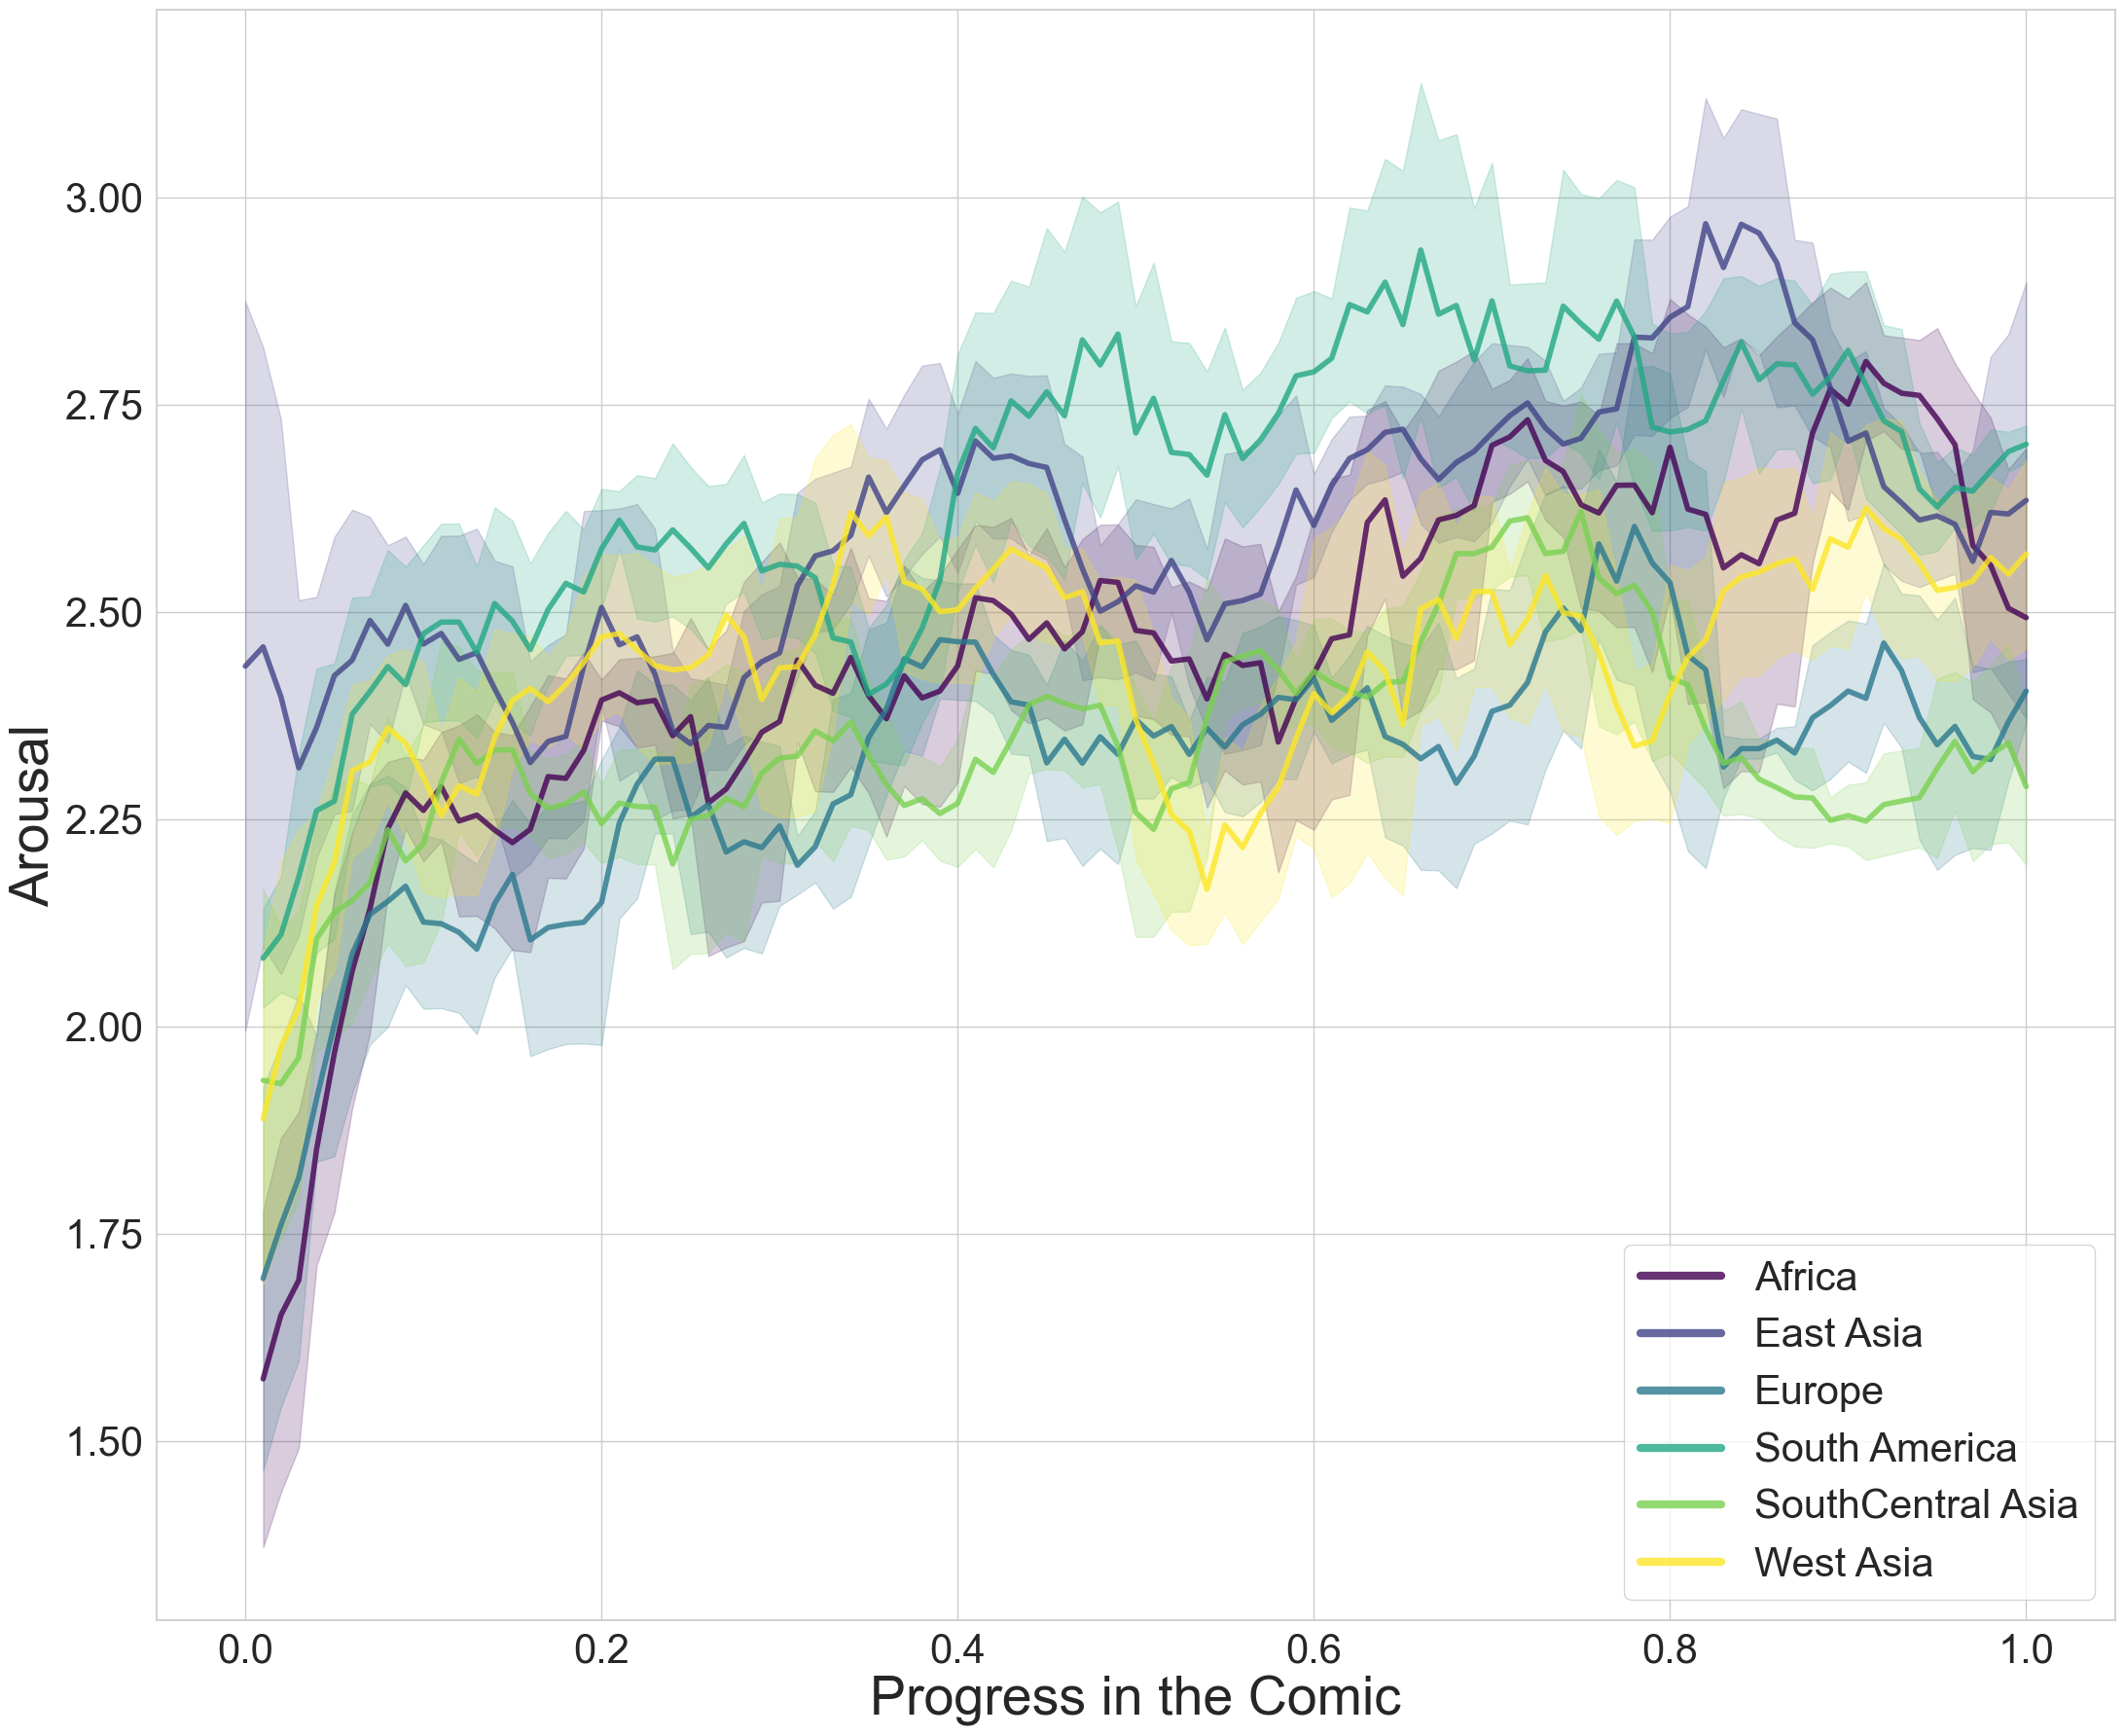

In [14]:
# Set plot style
sns.set(style="whitegrid")

# Define colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
region_names = ['Africa', 'East Asia', 'Europe', 'South America', 'SouthCentral Asia', 'West Asia']
colors = [cmap(i / (len(region_names) - 1)) for i in range(len(region_names))]
region_colors = {region: colors[idx] for idx, region in enumerate(region_names)}

def calculate_metrics(data, value_col, index_col, window):

    mean_arousal_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_arousal_by_panel['Arousal_SMA'] = mean_arousal_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    mean_arousal_by_panel['Arousal_SE'] = mean_arousal_by_panel[value_col].rolling(window=window, min_periods=1, center=True).std() / np.sqrt(window)
    return mean_arousal_by_panel

# Define the rolling window size
window = 5

# Create the first plot (with confidence intervals)
fig, ax1 = plt.subplots(figsize=(22, 18))

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_arousal_by_panel = calculate_metrics(region_data, 'Arousal', 'OrdinalPanel%Rounded2', window)
    
    # Calculate 97.5% confidence interval
    ci95 = norm.ppf(0.975)
    mean_arousal_by_panel['Arousal_CI'] = ci95 * mean_arousal_by_panel['Arousal_SE']

    # Plot SMA line
    ax1.plot(mean_arousal_by_panel['OrdinalPanel%Rounded2'], mean_arousal_by_panel['Arousal_SMA'], color=color, linewidth=4, label=f'{region}', alpha=0.8)
    
    # Plot confidence interval
    ax1.fill_between(mean_arousal_by_panel['OrdinalPanel%Rounded2'], 
                     mean_arousal_by_panel['Arousal_SMA'] - mean_arousal_by_panel['Arousal_CI'], 
                     mean_arousal_by_panel['Arousal_SMA'] + mean_arousal_by_panel['Arousal_CI'], 
                     color=color, alpha=0.2)

ax1.set_title('', fontsize=40)
ax1.set_xlabel('Progress in the Comic', fontsize=40)
ax1.set_ylabel('Arousal', fontsize=40)

# Configure legend
legend = ax1.legend(loc='lower right', fontsize=30, frameon=True)
for line in legend.get_lines():
    line.set_linewidth(6) 

ax1.grid(True)
ax1.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

In [15]:
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Store ANOVA results for each region
anova_results = {}

# Function to perform ANOVA and post-hoc test
def perform_anova_and_posthoc(data, value_col, index_col, num_segments):
    # Split data into num_segments segments based on index_col
    segment_indices = np.array_split(data[index_col].unique(), num_segments)
    
    # Collect data for each segment
    segment_data = []
    for segment in segment_indices:
        segment_values = data[data[index_col].isin(segment)][value_col]
        segment_data.append(segment_values)
    
    # Perform ANOVA test
    f_stat, p_value = f_oneway(*segment_data)
    print(f'ANOVA results for {region}: F-statistic = {f_stat}, p-value = {p_value}')
    
    # Check for significance
    if p_value < 0.05:
        print(f'Post-hoc test for {region} (p-value < 0.05):')
        # Combine data and labels for post-hoc
        combined_data = pd.DataFrame({value_col: data[value_col], index_col: pd.cut(data[index_col], bins=num_segments, labels=range(num_segments))})
        posthoc = pairwise_tukeyhsd(endog=combined_data[value_col], groups=combined_data[index_col], alpha=0.05)
        print(posthoc.summary())

        # Store ANOVA and post-hoc results
        anova_results[region] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': posthoc}
    else:
        print(f'No significant differences found for {region} (p-value >= 0.05).')
        anova_results[region] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': None}

# Perform ANOVA and post-hoc test for each region
for region in region_colors.keys():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_arousal_by_panel = calculate_metrics(region_data, 'Arousal', 'OrdinalPanel%Rounded2', window)
    
    # Perform ANOVA and post-hoc test
    perform_anova_and_posthoc(mean_arousal_by_panel, 'Arousal_SMA', 'OrdinalPanel%Rounded2', num_segments=5)

# Output ANOVA results
print("ANOVA Results Summary:")
for region, results in anova_results.items():
    print(f"{region} - F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")
    if results['posthoc']:
        print(results['posthoc'].summary())

ANOVA results for Africa: F-statistic = 56.681953442325245, p-value = 2.364047420122044e-24
Post-hoc test for Africa (p-value < 0.05):
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.2546    0.0  0.1435 0.3657   True
     0      2    0.333    0.0  0.2219 0.4441   True
     0      3   0.4984    0.0  0.3873 0.6095   True
     0      4   0.5256    0.0  0.4145 0.6367   True
     1      2   0.0784 0.2927 -0.0327 0.1895  False
     1      3   0.2438    0.0  0.1327 0.3549   True
     1      4    0.271    0.0  0.1599 0.3821   True
     2      3   0.1654 0.0007  0.0543 0.2765   True
     2      4   0.1926 0.0001  0.0815 0.3037   True
     3      4   0.0272 0.9601 -0.0839 0.1383  False
---------------------------------------------------
ANOVA results for East Asia: F-statistic = 42.29561885241849, p-value = 2.0838900838334814e-20
Post-hoc test for East Asia (p-value < 0.0

In [16]:
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Store ANOVA results for each segment
anova_results_by_segment = {}

# Function to perform ANOVA and post-hoc test
def perform_anova_and_posthoc_by_segment(data, value_col, region_col, segment_col, segments):
    # Collect data for each region within each segment
    for segment in segments:
        segment_data = data[data[segment_col] == segment]
        
        # Collect arousal values for each region within this segment
        region_data = [segment_data[segment_data[region_col] == region][value_col] for region in segment_data[region_col].unique()]
        
        # Perform ANOVA test if there are at least two groups
        if len(region_data) > 1:
            f_stat, p_value = f_oneway(*region_data)
            print(f'ANOVA results for segment {segment}: F-statistic = {f_stat}, p-value = {p_value}')
            
            # Check for significance
            if p_value < 0.05:
                print(f'Post-hoc test for segment {segment} (p-value < 0.05):')
                # Combine data and labels for post-hoc
                posthoc = pairwise_tukeyhsd(endog=segment_data[value_col], groups=segment_data[region_col], alpha=0.05)
                print(posthoc.summary())

                # Store ANOVA and post-hoc results
                anova_results_by_segment[segment] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': posthoc}
            else:
                print(f'No significant differences found for segment {segment} (p-value >= 0.05).')
                anova_results_by_segment[segment] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': None}
        else:
            print(f'Not enough data for ANOVA in segment {segment}. Skipping...')

df_region_sample['Segment'] = pd.cut(df_region_sample['OrdinalPanel%Rounded2'], bins=5, labels=range(5))

# List of segments
segments = df_region_sample['Segment'].unique()

# Perform ANOVA and post-hoc test for each segment
perform_anova_and_posthoc_by_segment(df_region_sample, 'Arousal', 'RegionSimplified', 'Segment', segments)

# Output ANOVA results
print("ANOVA Results Summary by Segment:")
for segment, results in anova_results_by_segment.items():
    print(f"Segment {segment} - F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")
    if results['posthoc']:
        print(results['posthoc'].summary())

ANOVA results for segment 0: F-statistic = 18.135518881744687, p-value = 7.22357343274806e-18
Post-hoc test for segment 0 (p-value < 0.05):
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
           Africa         East Asia   0.2505    0.0  0.1095  0.3916   True
           Africa            Europe  -0.0874 0.5267 -0.2333  0.0585  False
           Africa     South America   0.2624    0.0  0.1179  0.4069   True
           Africa SouthCentral Asia   0.0573 0.8915 -0.0947  0.2093  False
           Africa         West Asia   0.1275 0.1723 -0.0268  0.2817  False
        East Asia            Europe  -0.3379    0.0 -0.4649 -0.2109   True
        East Asia     South America   0.0119 0.9998 -0.1135  0.1373  False
        East Asia SouthCentral Asia  -0.1932 0.0006 -0.3272 -0.0593   True
        East Asia         West Asia

## **Valence Arc**

Mean Calculated from SMA Values for Valence


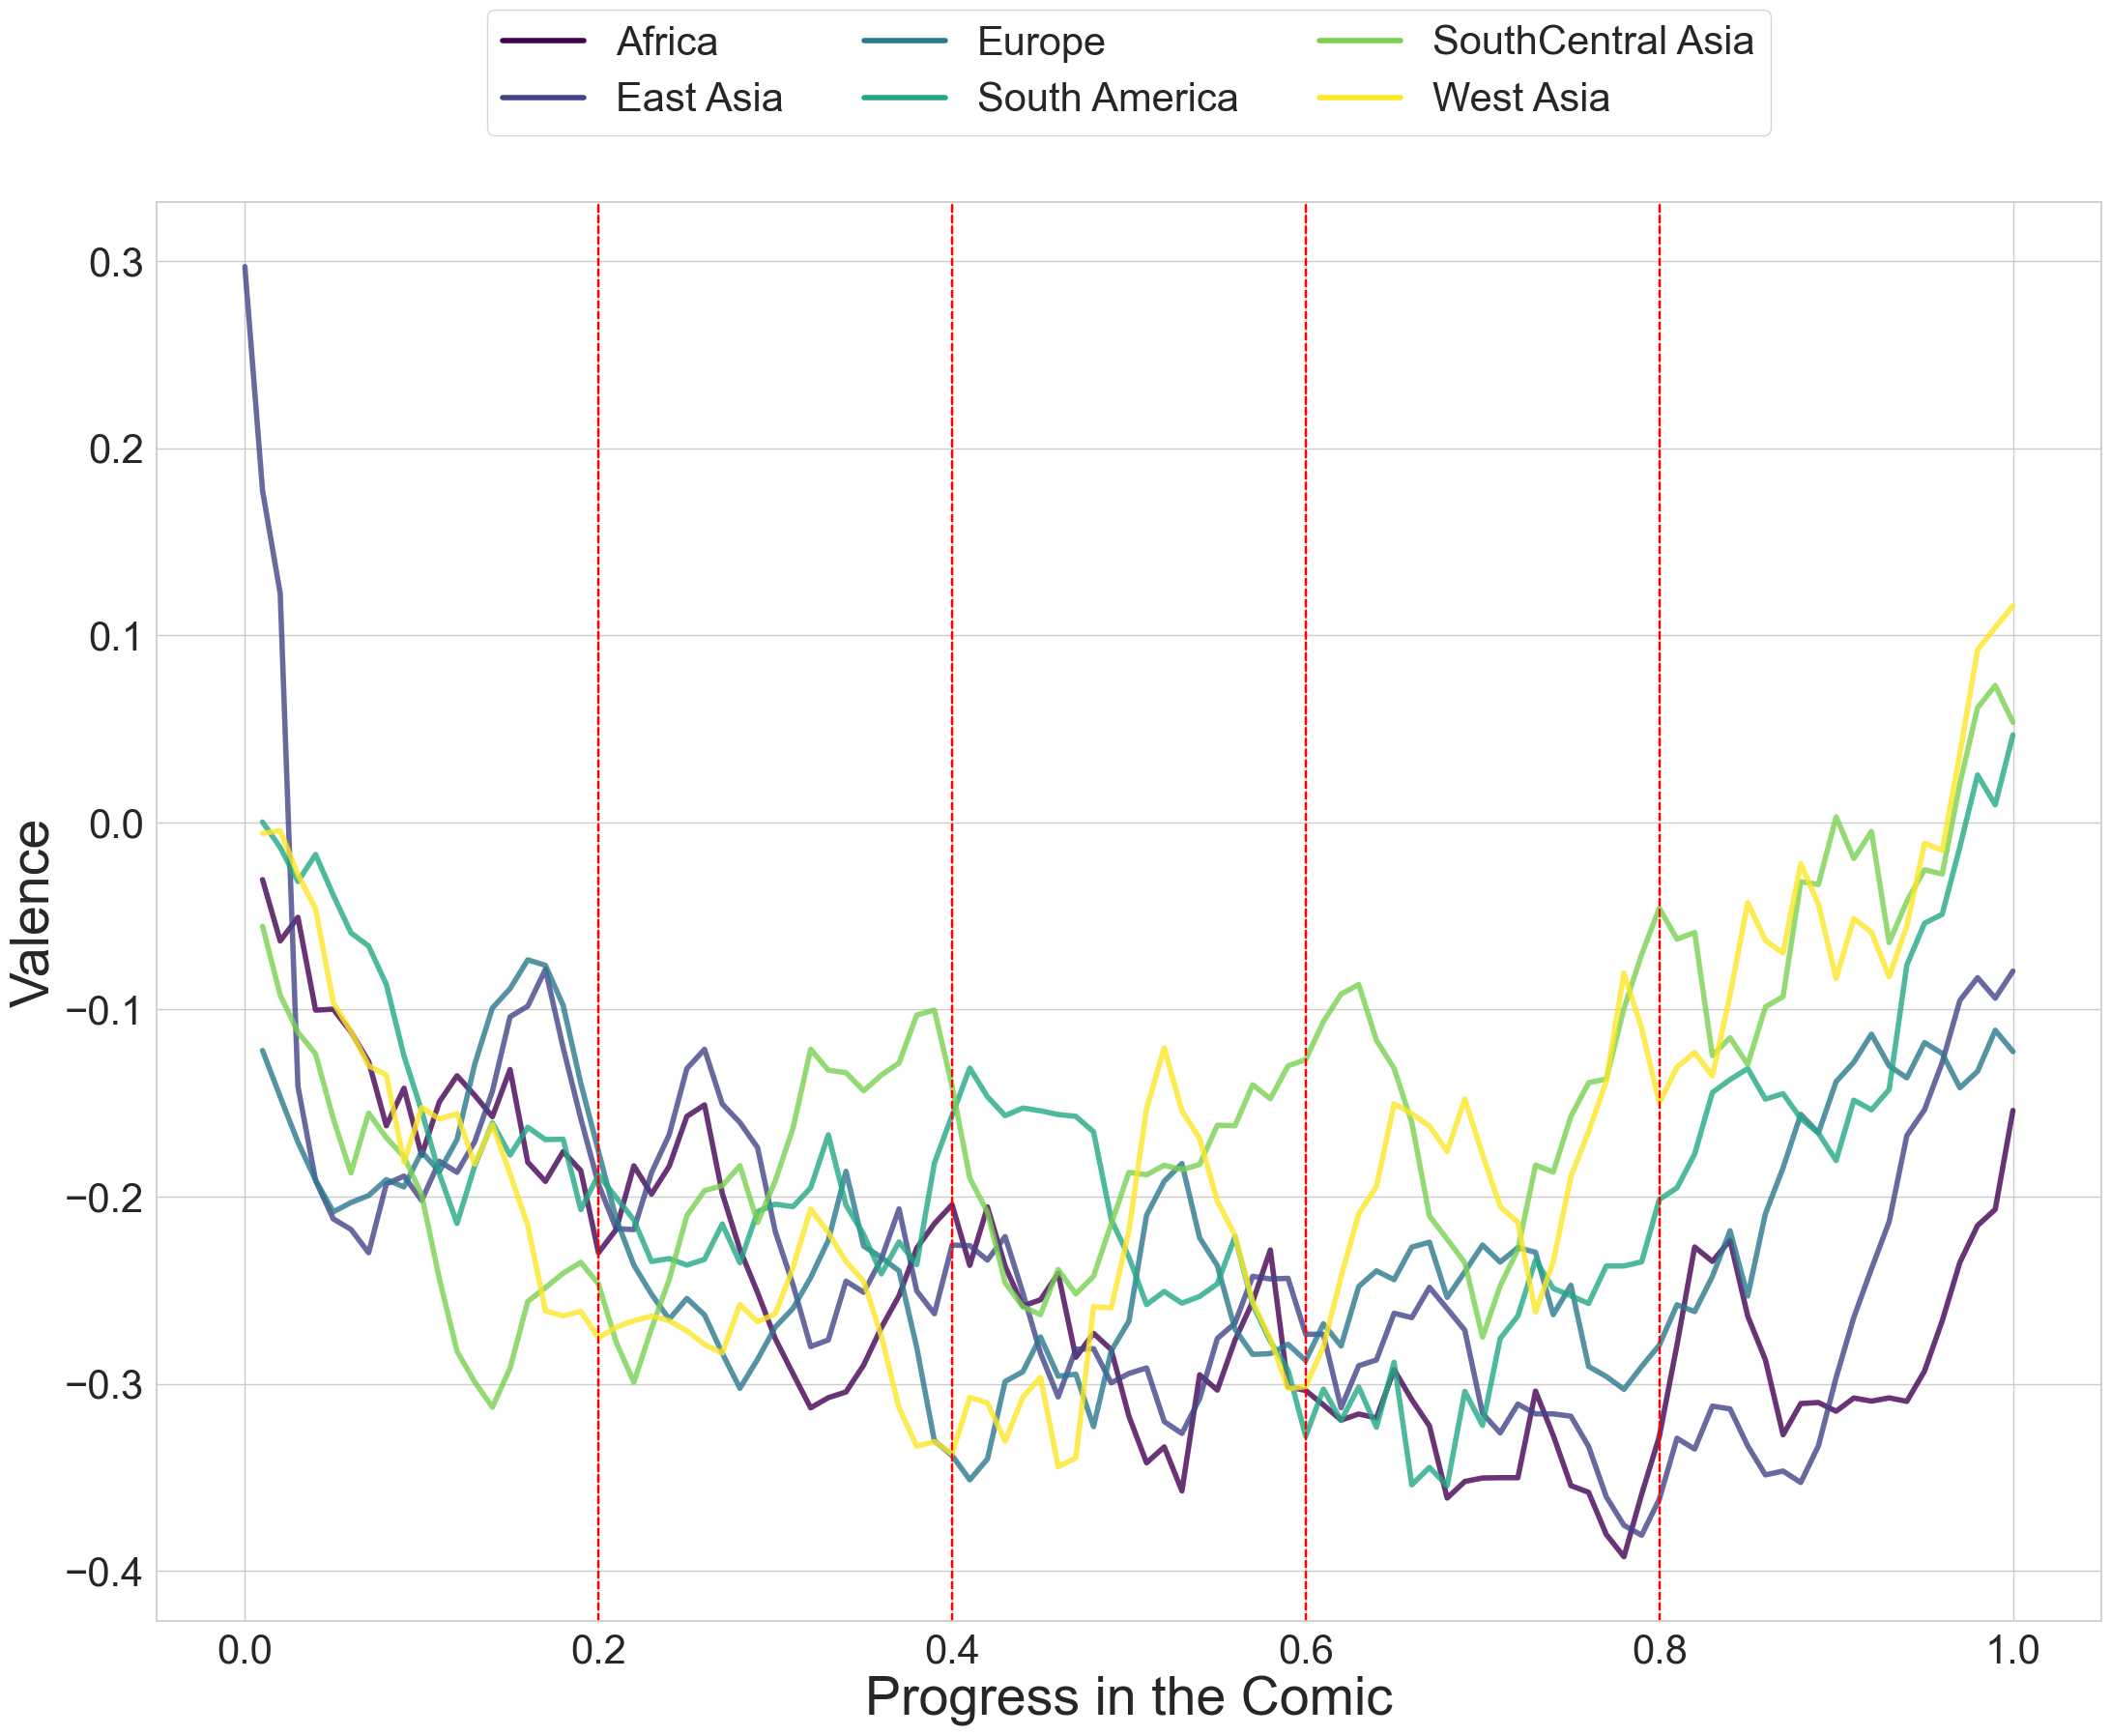

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Set plot style
sns.set(style="whitegrid")

# Use a colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
colors = [cmap(i / 5) for i in range(6)]
region_colors = {
    'Africa': colors[0],
    'East Asia': colors[1],
    'Europe': colors[2],
    'South America': colors[3],
    'SouthCentral Asia': colors[4],
    'West Asia': colors[5]
}

def calculate_metrics(data, value_col, index_col, window):
    mean_valence_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_valence_by_panel['Valence_SMA'] = mean_valence_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    return mean_valence_by_panel

# Define the rolling window size
window = 5

# Create plot
fig, ax2 = plt.subplots(figsize=(22, 18))

print("Mean Calculated from SMA Values for Valence")

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_valence_by_panel = calculate_metrics(region_data, 'Valence#', 'OrdinalPanel%Rounded2', window)
    
    # Plot SMA line
    ax2.plot(mean_valence_by_panel['OrdinalPanel%Rounded2'], mean_valence_by_panel['Valence_SMA'], color=color, linewidth=4, label=f'{region} SMA (window={window})', alpha=0.8)

    # Calculate and add dashed lines to split data into 5 segments
    num_segments = 5
    segment_indices = np.array_split(mean_valence_by_panel.index, num_segments)
    segment_points = [mean_valence_by_panel['OrdinalPanel%Rounded2'].iloc[segment[-1]] for segment in segment_indices]

    for sp in segment_points[:-1]: 
        ax2.axvline(x=sp, color='red', linestyle='--')

# Set up legend in the upper center
legend_lines = [Line2D([0], [0], color=color, linewidth=4) for color in region_colors.values()]
legend_labels = [f'{region}' for region in region_colors.keys()]

ax2.legend(legend_lines, legend_labels, loc='upper center', fontsize=30, frameon=True, bbox_to_anchor=(0.5, 1.15), ncol=3)

ax2.set_title('', fontsize=40)
ax2.set_xlabel('Progress in the Comic', fontsize=40)
ax2.set_ylabel('Valence', fontsize=40)

ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

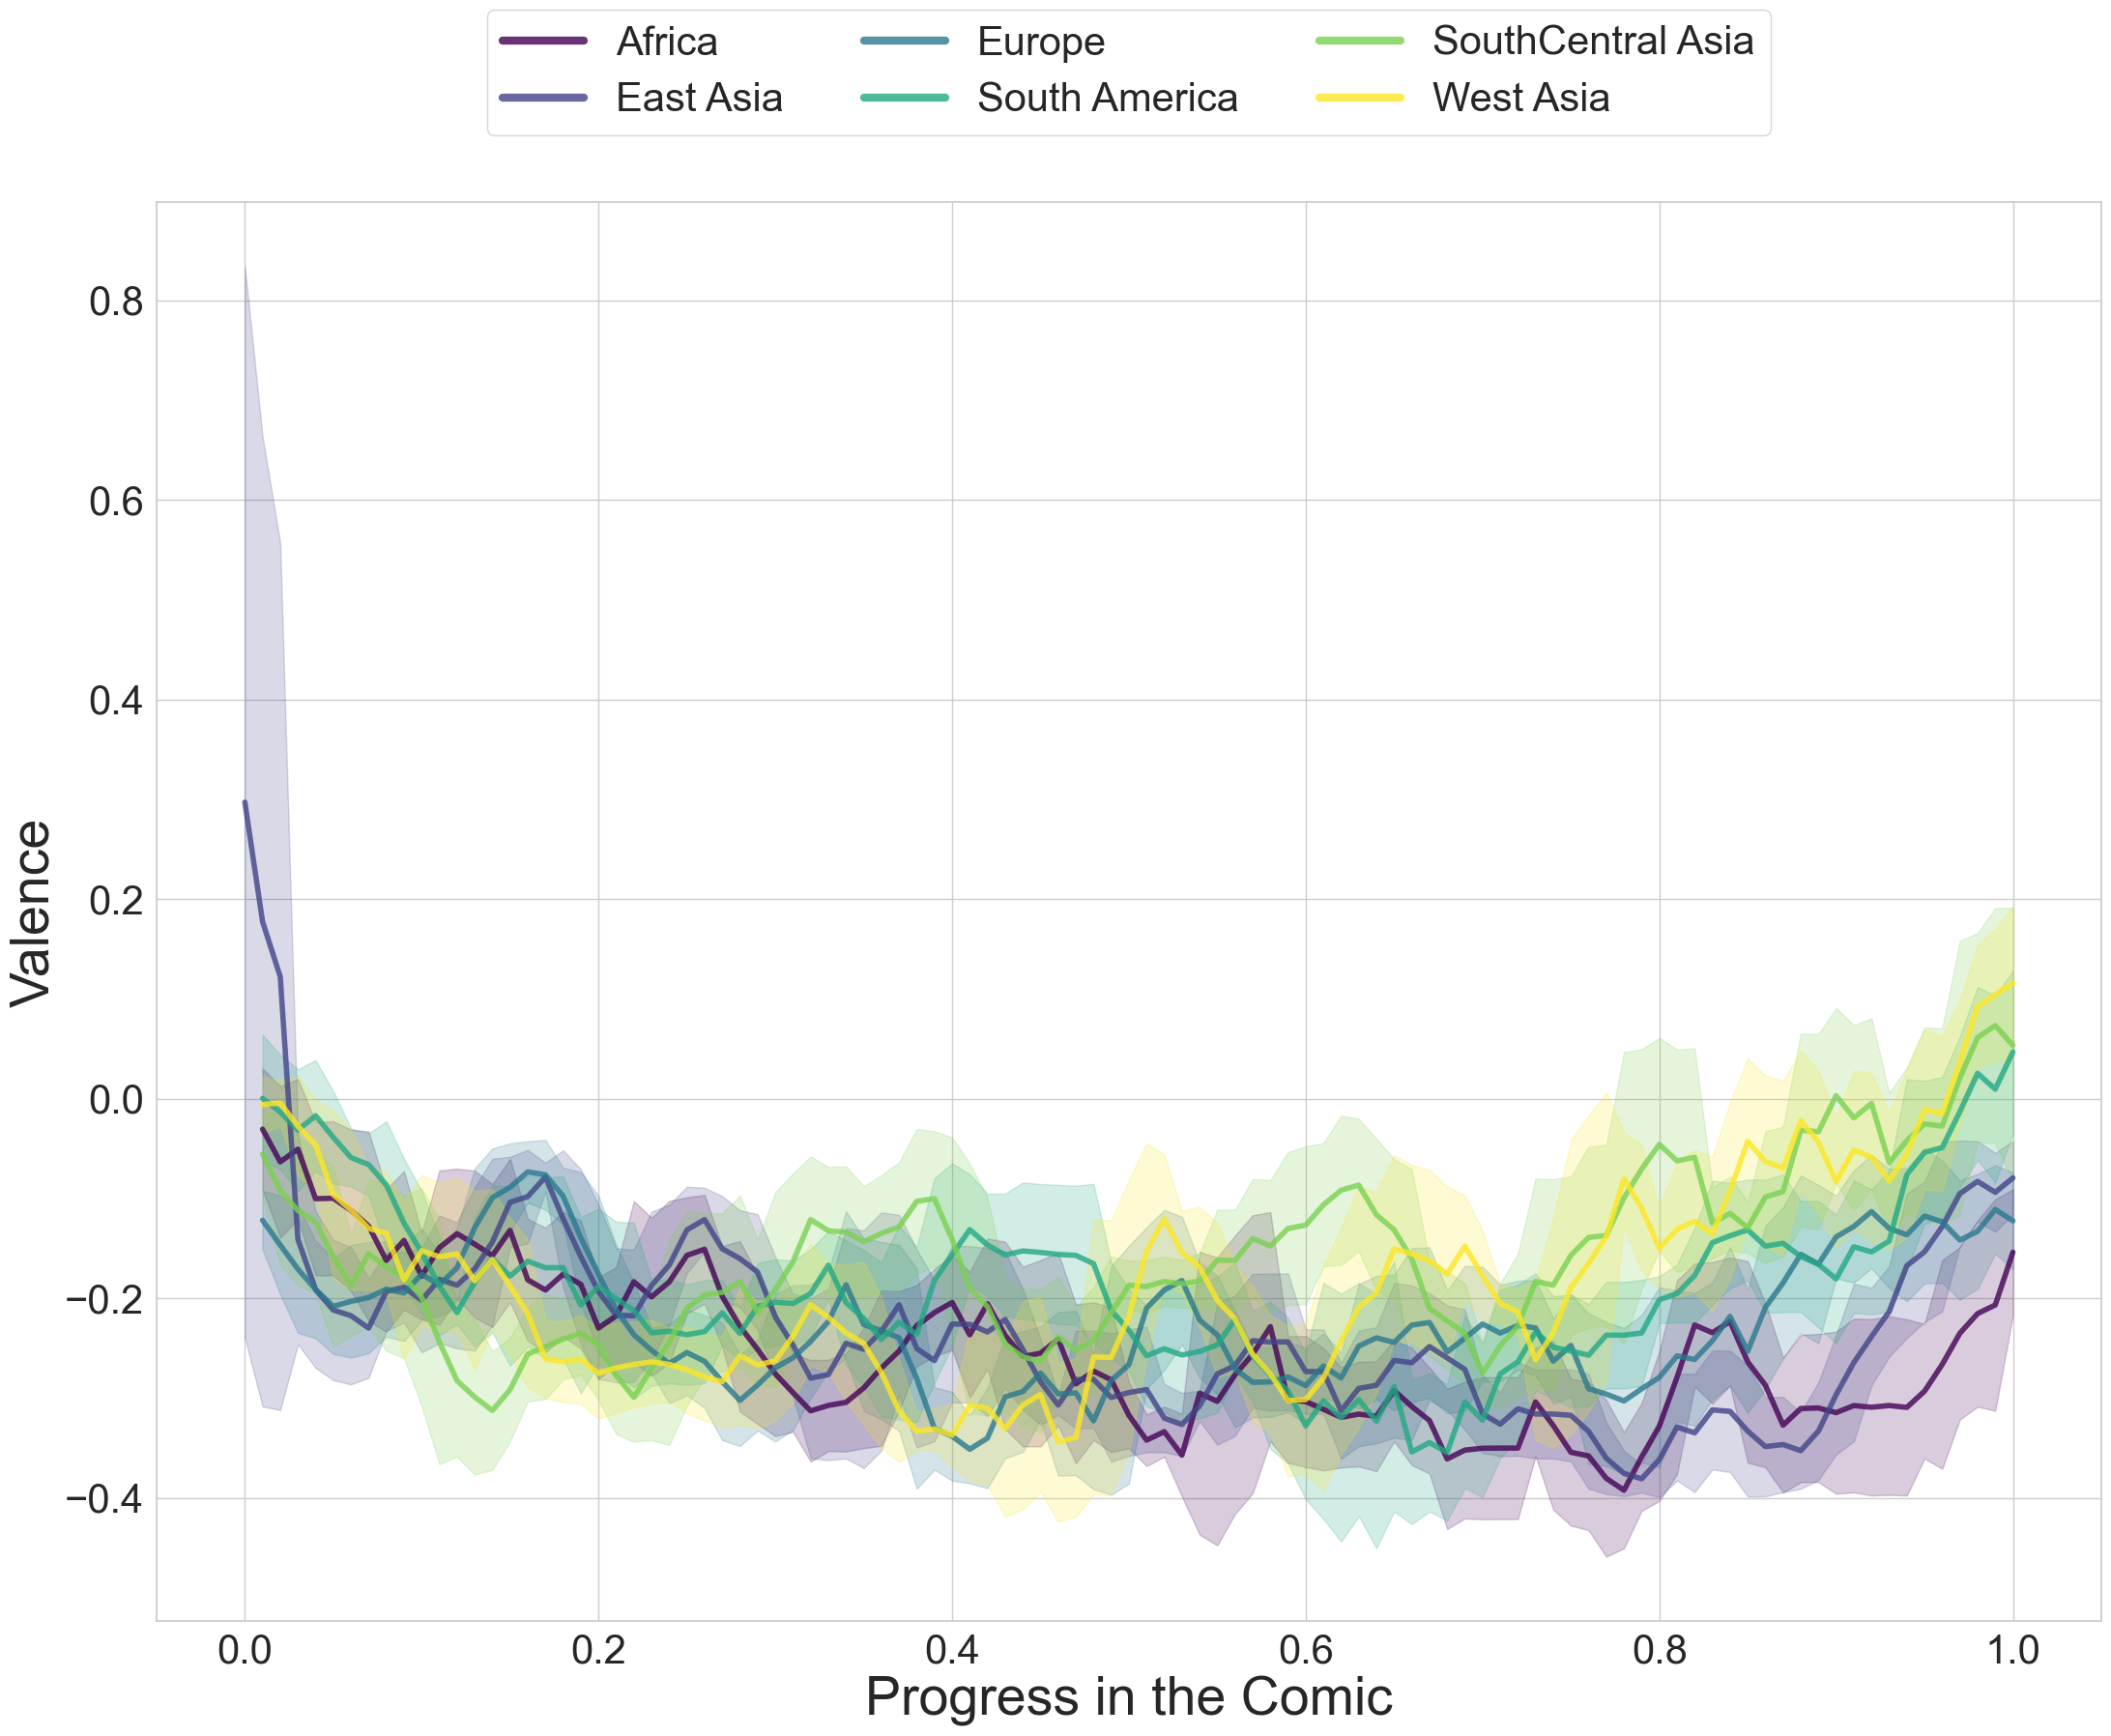

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from matplotlib.lines import Line2D

# Set plot style
sns.set(style="whitegrid")

# Define colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
region_names = ['Africa', 'East Asia', 'Europe', 'South America', 'SouthCentral Asia', 'West Asia']
colors = [cmap(i / (len(region_names) - 1)) for i in range(len(region_names))]
region_colors = {region: colors[idx] for idx, region in enumerate(region_names)}

def calculate_metrics(data, value_col, index_col, window):
    mean_valence_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_valence_by_panel['Valence_SMA'] = mean_valence_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    mean_valence_by_panel['Valence_SE'] = mean_valence_by_panel[value_col].rolling(window=window, min_periods=1, center=True).std() / np.sqrt(window)
    return mean_valence_by_panel

# Define the rolling window size
window = 5

# Create the plot for Valence with confidence intervals
fig, ax2 = plt.subplots(figsize=(22, 18))

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_valence_by_panel = calculate_metrics(region_data, 'Valence#', 'OrdinalPanel%Rounded2', window)
    
    # Calculate 97.5% confidence interval
    ci95 = norm.ppf(0.975)
    mean_valence_by_panel['Valence_CI'] = ci95 * mean_valence_by_panel['Valence_SE']

    # Plot SMA line for Valence
    ax2.plot(mean_valence_by_panel['OrdinalPanel%Rounded2'], mean_valence_by_panel['Valence_SMA'], color=color, linewidth=4, label=f'{region}', alpha=0.8)
    
    # Plot confidence interval for Valence
    ax2.fill_between(mean_valence_by_panel['OrdinalPanel%Rounded2'], 
                     mean_valence_by_panel['Valence_SMA'] - mean_valence_by_panel['Valence_CI'], 
                     mean_valence_by_panel['Valence_SMA'] + mean_valence_by_panel['Valence_CI'], 
                     color=color, alpha=0.2)

ax2.set_title('', fontsize=40)
ax2.set_xlabel('Progress in the Comic', fontsize=40)
ax2.set_ylabel('Valence', fontsize=40)

# Configure legend to be at the upper center
legend = ax2.legend(loc='upper center', fontsize=30, frameon=True, bbox_to_anchor=(0.5, 1.15), ncol=3)
for line in legend.get_lines():
    line.set_linewidth(6)

ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

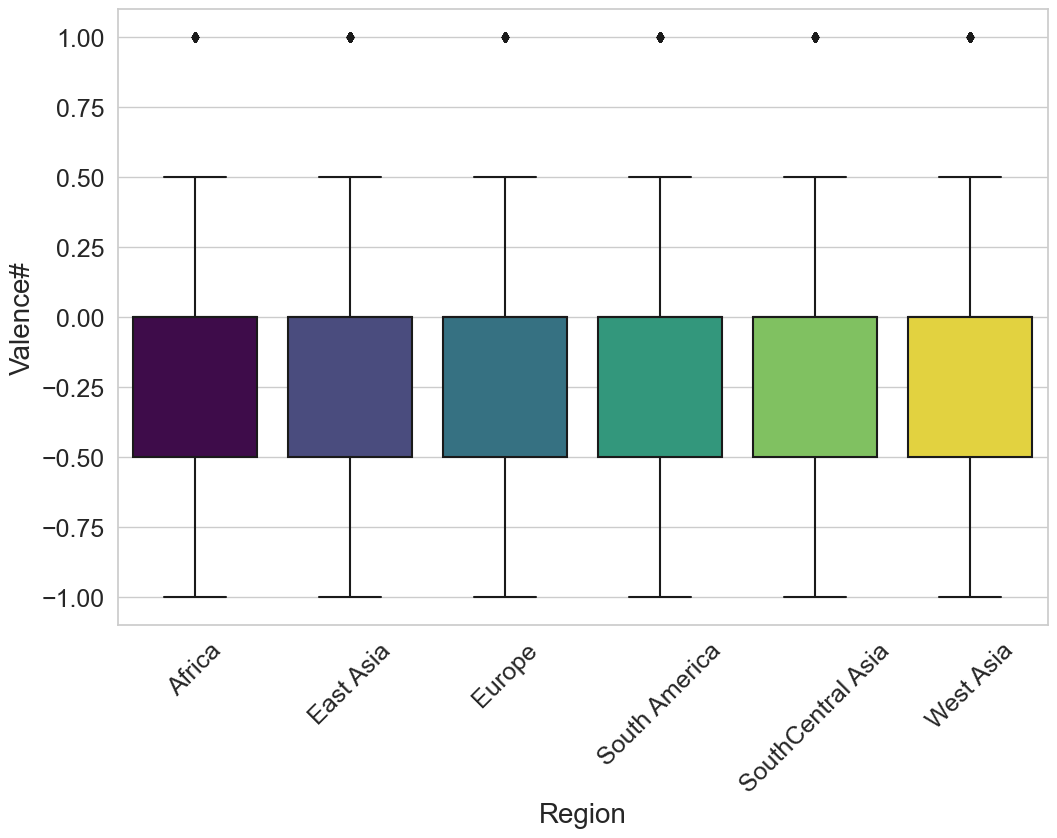

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots
sns.set(style="whitegrid")

# Create a new column 'Segment' by binning the 'OrdinalPanel%Rounded2' into 5 segments
df_region_sample['Segment'] = pd.cut(df_region_sample['OrdinalPanel%Rounded2'], bins=5, labels=range(5))

# Filter the data to include only rows where 'Segment' equals 0
segment_0_data = df_region_sample[df_region_sample['Segment'] == 0]

# Create a color palette based on the unique regions in the filtered data
palette_colors = [region_colors[region] for region in segment_0_data['RegionSimplified'].unique()]

# Create a figure with specified size
plt.figure(figsize=(12, 8))
sns.boxplot(x='RegionSimplified', y='Valence#', data=segment_0_data, palette=palette_colors)


plt.title('', fontsize=18)  
plt.xlabel('Region', fontsize=20)
plt.ylabel('Valence#', fontsize=20) 
plt.xticks(rotation=45, fontsize=18) 
plt.yticks(fontsize=18) 

plt.show()

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Store ANOVA results for each region
anova_results_valence = {}

# Function to perform ANOVA and post-hoc test
def perform_anova_and_posthoc(data, value_col, index_col, num_segments):
    # Split data into num_segments segments based on index_col
    segment_indices = np.array_split(data[index_col].unique(), num_segments)
    
    # Collect data for each segment
    segment_data = []
    for segment in segment_indices:
        segment_values = data[data[index_col].isin(segment)][value_col]
        segment_data.append(segment_values)
    
    # Perform ANOVA test
    f_stat, p_value = f_oneway(*segment_data)
    print(f'ANOVA results for {region}: F-statistic = {f_stat}, p-value = {p_value}')
    
    # Check for significance
    if p_value < 0.05:
        print(f'Post-hoc test for {region} (p-value < 0.05):')
        # Combine data and labels for post-hoc
        combined_data = pd.DataFrame({value_col: data[value_col], index_col: pd.cut(data[index_col], bins=num_segments, labels=range(num_segments))})
        posthoc = pairwise_tukeyhsd(endog=combined_data[value_col], groups=combined_data[index_col], alpha=0.05)
        print(posthoc.summary())

        # Store ANOVA and post-hoc results
        anova_results_valence[region] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': posthoc}
    else:
        print(f'No significant differences found for {region} (p-value >= 0.05).')
        anova_results_valence[region] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': None}

# Perform ANOVA and post-hoc test for each region on Valence#
for region in region_colors.keys():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_valence_by_panel = calculate_metrics(region_data, 'Valence#', 'OrdinalPanel%Rounded2', window)
    
    # Perform ANOVA and post-hoc test
    perform_anova_and_posthoc(mean_valence_by_panel, 'Valence_SMA', 'OrdinalPanel%Rounded2', num_segments=5)

# Output ANOVA results for Valence#
print("ANOVA Results Summary for Valence#:")
for region, results in anova_results_valence.items():
    print(f"{region} - F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")
    if results['posthoc']:
        print(results['posthoc'].summary())

ANOVA results for Africa: F-statistic = 56.111554988448894, p-value = 3.305277512059008e-24
Post-hoc test for Africa (p-value < 0.05):
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0986    0.0 -0.1373 -0.0599   True
     0      2  -0.1419    0.0 -0.1806 -0.1032   True
     0      3  -0.2002    0.0  -0.239 -0.1615   True
     0      4  -0.1315    0.0 -0.1702 -0.0928   True
     1      2  -0.0433 0.0202 -0.0821 -0.0046   True
     1      3  -0.1017    0.0 -0.1404 -0.0629   True
     1      4  -0.0329  0.134 -0.0717  0.0058  False
     2      3  -0.0583 0.0006  -0.097 -0.0196   True
     2      4   0.0104 0.9446 -0.0283  0.0491  False
     3      4   0.0687    0.0    0.03  0.1075   True
----------------------------------------------------
ANOVA results for East Asia: F-statistic = 15.727678096998066, p-value = 6.233800704225816e-10
Post-hoc test for East Asia 

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Store ANOVA results for each segment
anova_results_by_segment_valence = {}

# Function to perform ANOVA and post-hoc test
def perform_anova_and_posthoc_by_segment(data, value_col, region_col, segment_col, segments):
    # Collect data for each region within each segment
    for segment in segments:
        segment_data = data[data[segment_col] == segment]
        
        # Collect Valence values for each region within this segment
        region_data = [segment_data[segment_data[region_col] == region][value_col] for region in segment_data[region_col].unique()]
        
        # Perform ANOVA test if there are at least two groups
        if len(region_data) > 1:
            f_stat, p_value = f_oneway(*region_data)
            print(f'ANOVA results for segment {segment}: F-statistic = {f_stat}, p-value = {p_value}')
            
            # Check for significance
            if p_value < 0.05:
                print(f'Post-hoc test for segment {segment} (p-value < 0.05):')
                # Combine data and labels for post-hoc
                posthoc = pairwise_tukeyhsd(endog=segment_data[value_col], groups=segment_data[region_col], alpha=0.05)
                print(posthoc.summary())

                # Store ANOVA and post-hoc results
                anova_results_by_segment_valence[segment] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': posthoc}
            else:
                print(f'No significant differences found for segment {segment} (p-value >= 0.05).')
                anova_results_by_segment_valence[segment] = {'F-statistic': f_stat, 'p-value': p_value, 'posthoc': None}
        else:
            print(f'Not enough data for ANOVA in segment {segment}. Skipping...')

df_region_sample['Segment'] = pd.cut(df_region_sample['OrdinalPanel%Rounded2'], bins=5, labels=range(5))

# List of segments
segments = df_region_sample['Segment'].unique()

# Perform ANOVA and post-hoc test for each segment on Valence#
perform_anova_and_posthoc_by_segment(df_region_sample, 'Valence#', 'RegionSimplified', 'Segment', segments)

# Output ANOVA results for Valence#
print("ANOVA Results Summary by Segment for Valence#:")
for segment, results in anova_results_by_segment_valence.items():
    print(f"Segment {segment} - F-statistic: {results['F-statistic']}, p-value: {results['p-value']}")
    if results['posthoc']:
        print(results['posthoc'].summary())

ANOVA results for segment 0: F-statistic = 2.3026613505765616, p-value = 0.04227041830915244
Post-hoc test for segment 0 (p-value < 0.05):
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
           Africa         East Asia  -0.0178 0.9879 -0.0971  0.0615  False
           Africa            Europe  -0.0116 0.9986 -0.0937  0.0704  False
           Africa     South America   0.0209 0.9777 -0.0603  0.1022  False
           Africa SouthCentral Asia  -0.0686 0.1986 -0.1541  0.0168  False
           Africa         West Asia  -0.0182 0.9912 -0.1049  0.0685  False
        East Asia            Europe   0.0062 0.9999 -0.0652  0.0776  False
        East Asia     South America   0.0387 0.6202 -0.0317  0.1092  False
        East Asia SouthCentral Asia  -0.0508 0.3879 -0.1261  0.0245  False
        East Asia         West Asia 

## **Close Reading**

Mean Calculated from SMA Values


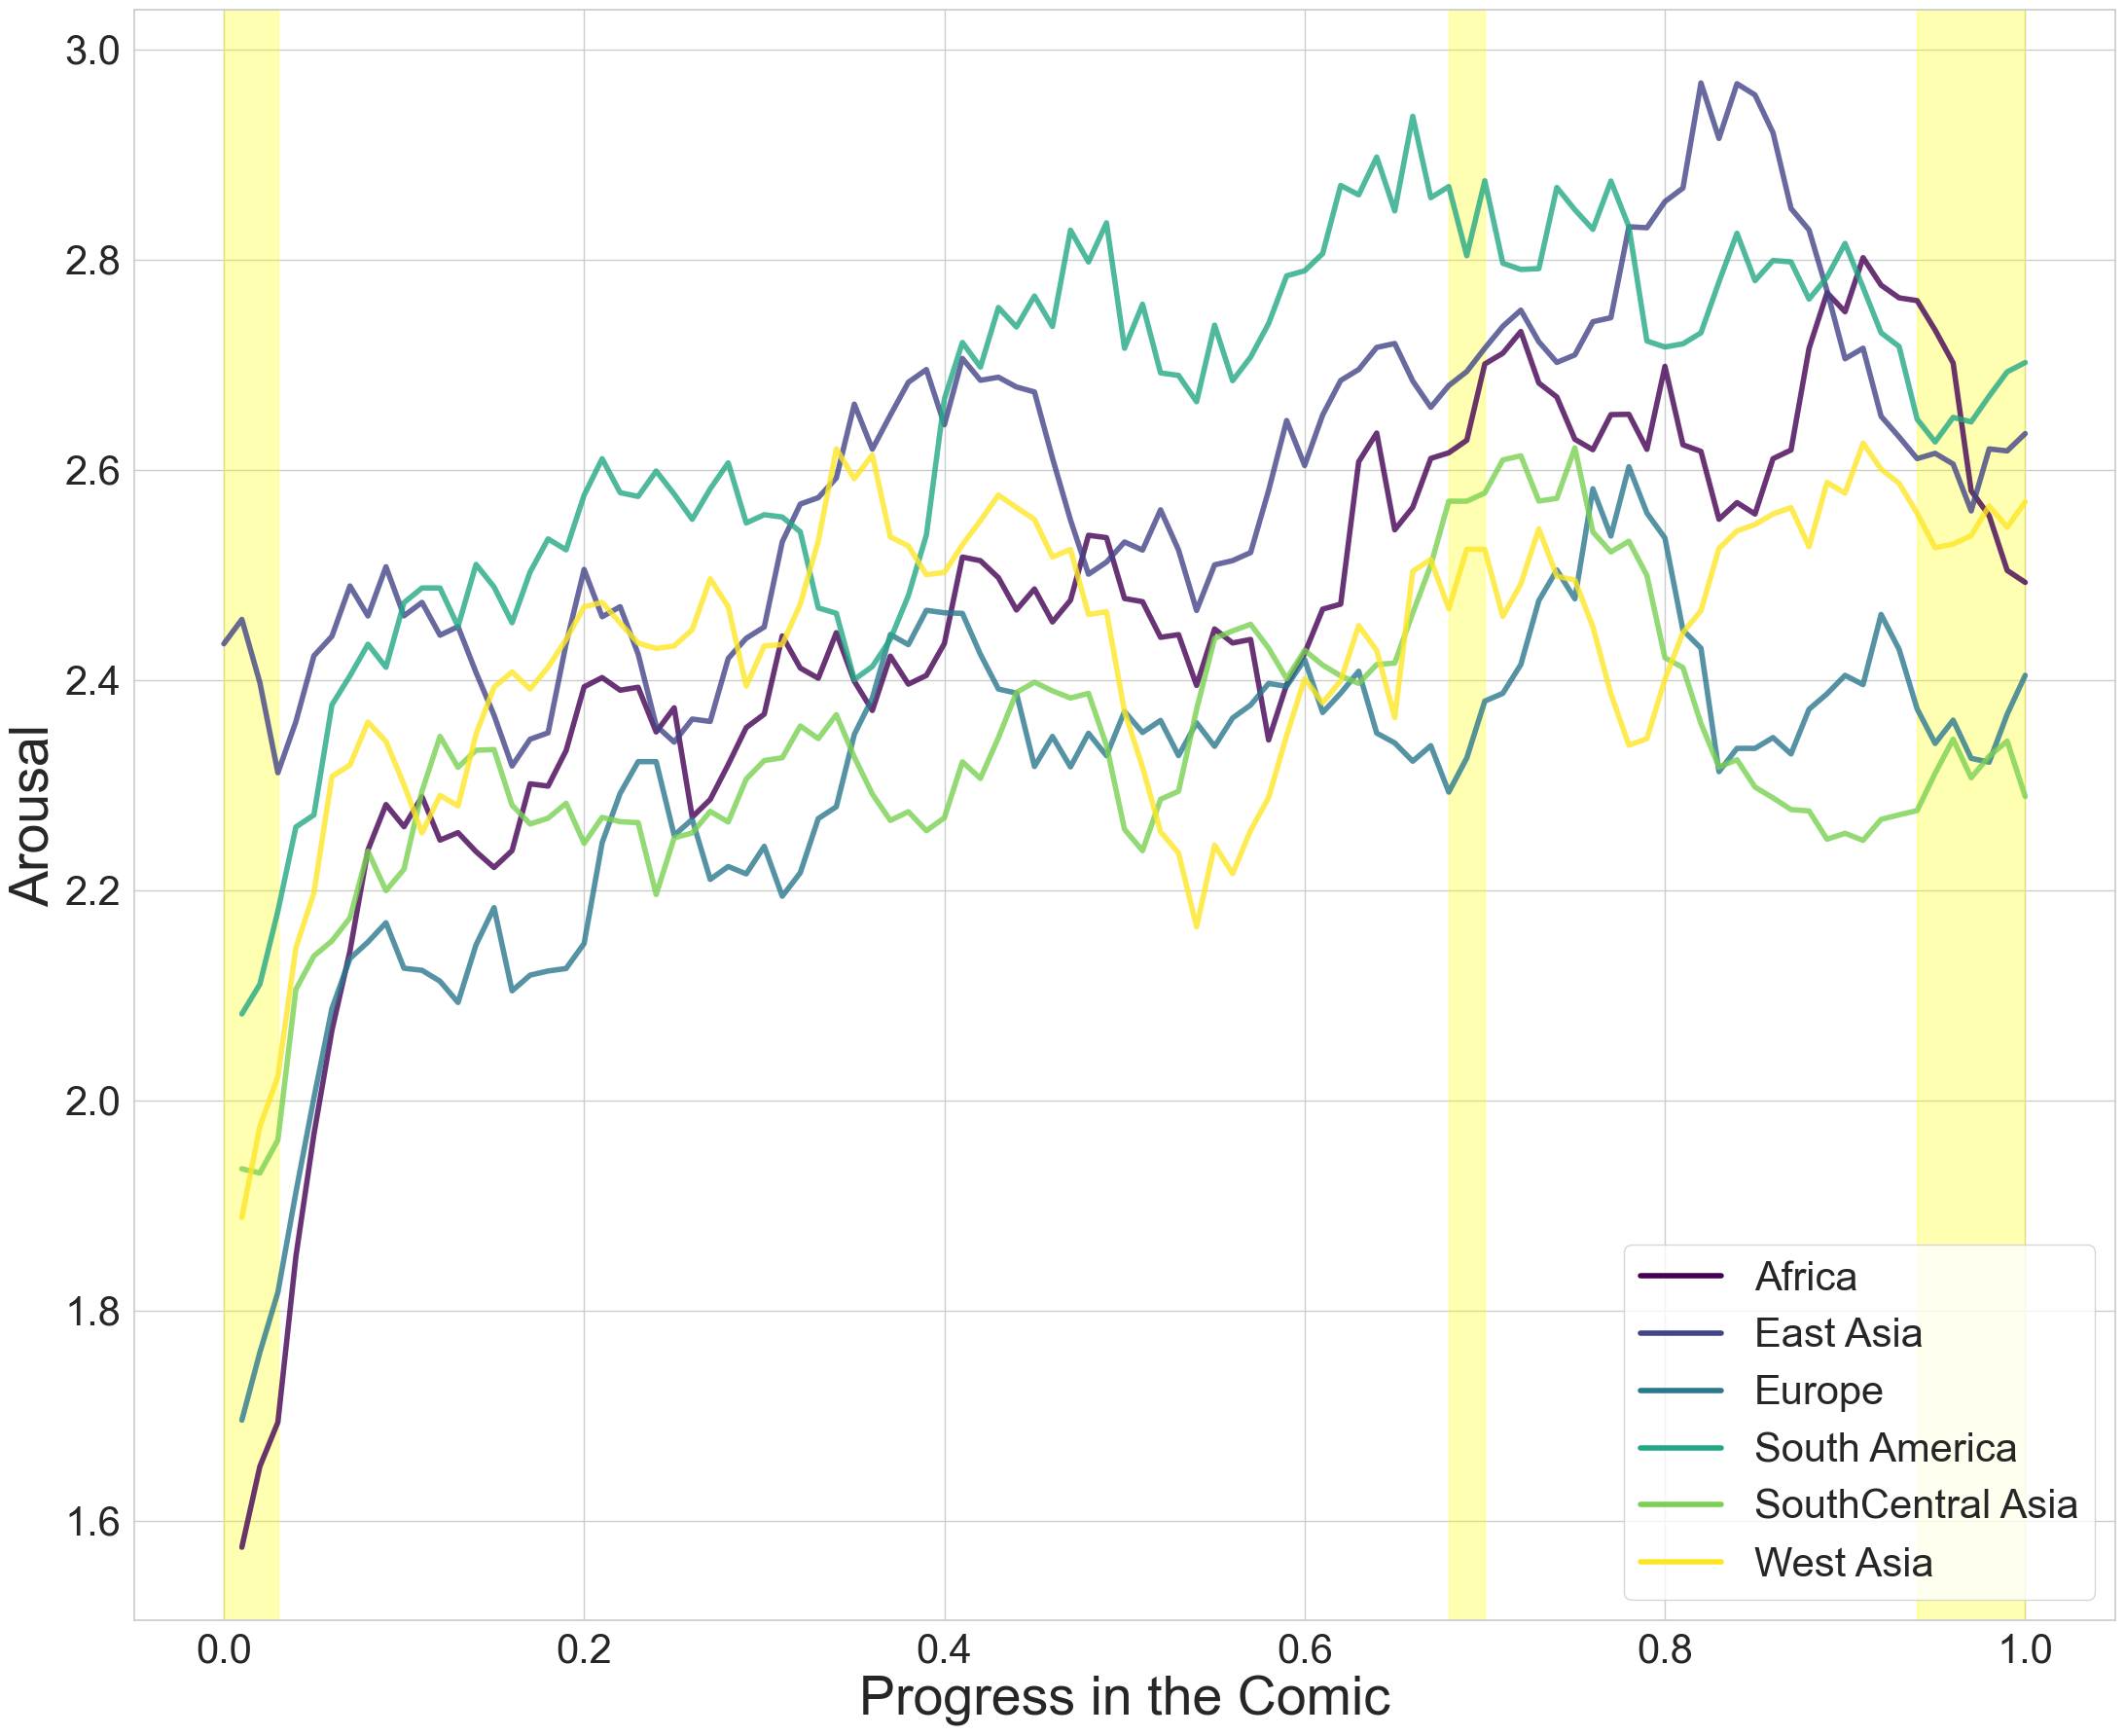

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from matplotlib.lines import Line2D

# Set plot style
sns.set(style="whitegrid")

# Use a colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
colors = [cmap(i / 5) for i in range(6)]
region_colors = {
    'Africa': colors[0],
    'East Asia': colors[1],
    'Europe': colors[2],
    'South America': colors[3],
    'SouthCentral Asia': colors[4],
    'West Asia': colors[5]
}

def calculate_metrics(data, value_col, index_col, window):
    mean_arousal_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_arousal_by_panel['Arousal_SMA'] = mean_arousal_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    return mean_arousal_by_panel

# Define the rolling window size
window = 5

# Create plot
fig, ax2 = plt.subplots(figsize=(22, 18))

print("Mean Calculated from SMA Values")

# Highlight specific regions
highlight_regions = [(0.0, 0.03), (0.68, 0.70), (0.94, 1.0)]  
for start, end in highlight_regions:
    ax2.axvspan(start, end, color='yellow', alpha=0.3)

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_arousal_by_panel = calculate_metrics(region_data, 'Arousal', 'OrdinalPanel%Rounded2', window)
    
    # Plot SMA line
    ax2.plot(mean_arousal_by_panel['OrdinalPanel%Rounded2'], mean_arousal_by_panel['Arousal_SMA'], color=color, linewidth=4, label=f'{region} SMA (window={window})', alpha=0.8)

# Set up legend
legend_lines = [Line2D([0], [0], color=color, linewidth=4) for color in region_colors.values()]
legend_labels = [f'{region}' for region in region_colors.keys()]

ax2.legend(legend_lines, legend_labels, loc='lower right', fontsize=30, frameon=True)

ax2.set_title('', fontsize=40)
ax2.set_xlabel('Progress in the Comic', fontsize=40)
ax2.set_ylabel('Arousal', fontsize=40)

ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

Mean Calculated from SMA Values for Valence


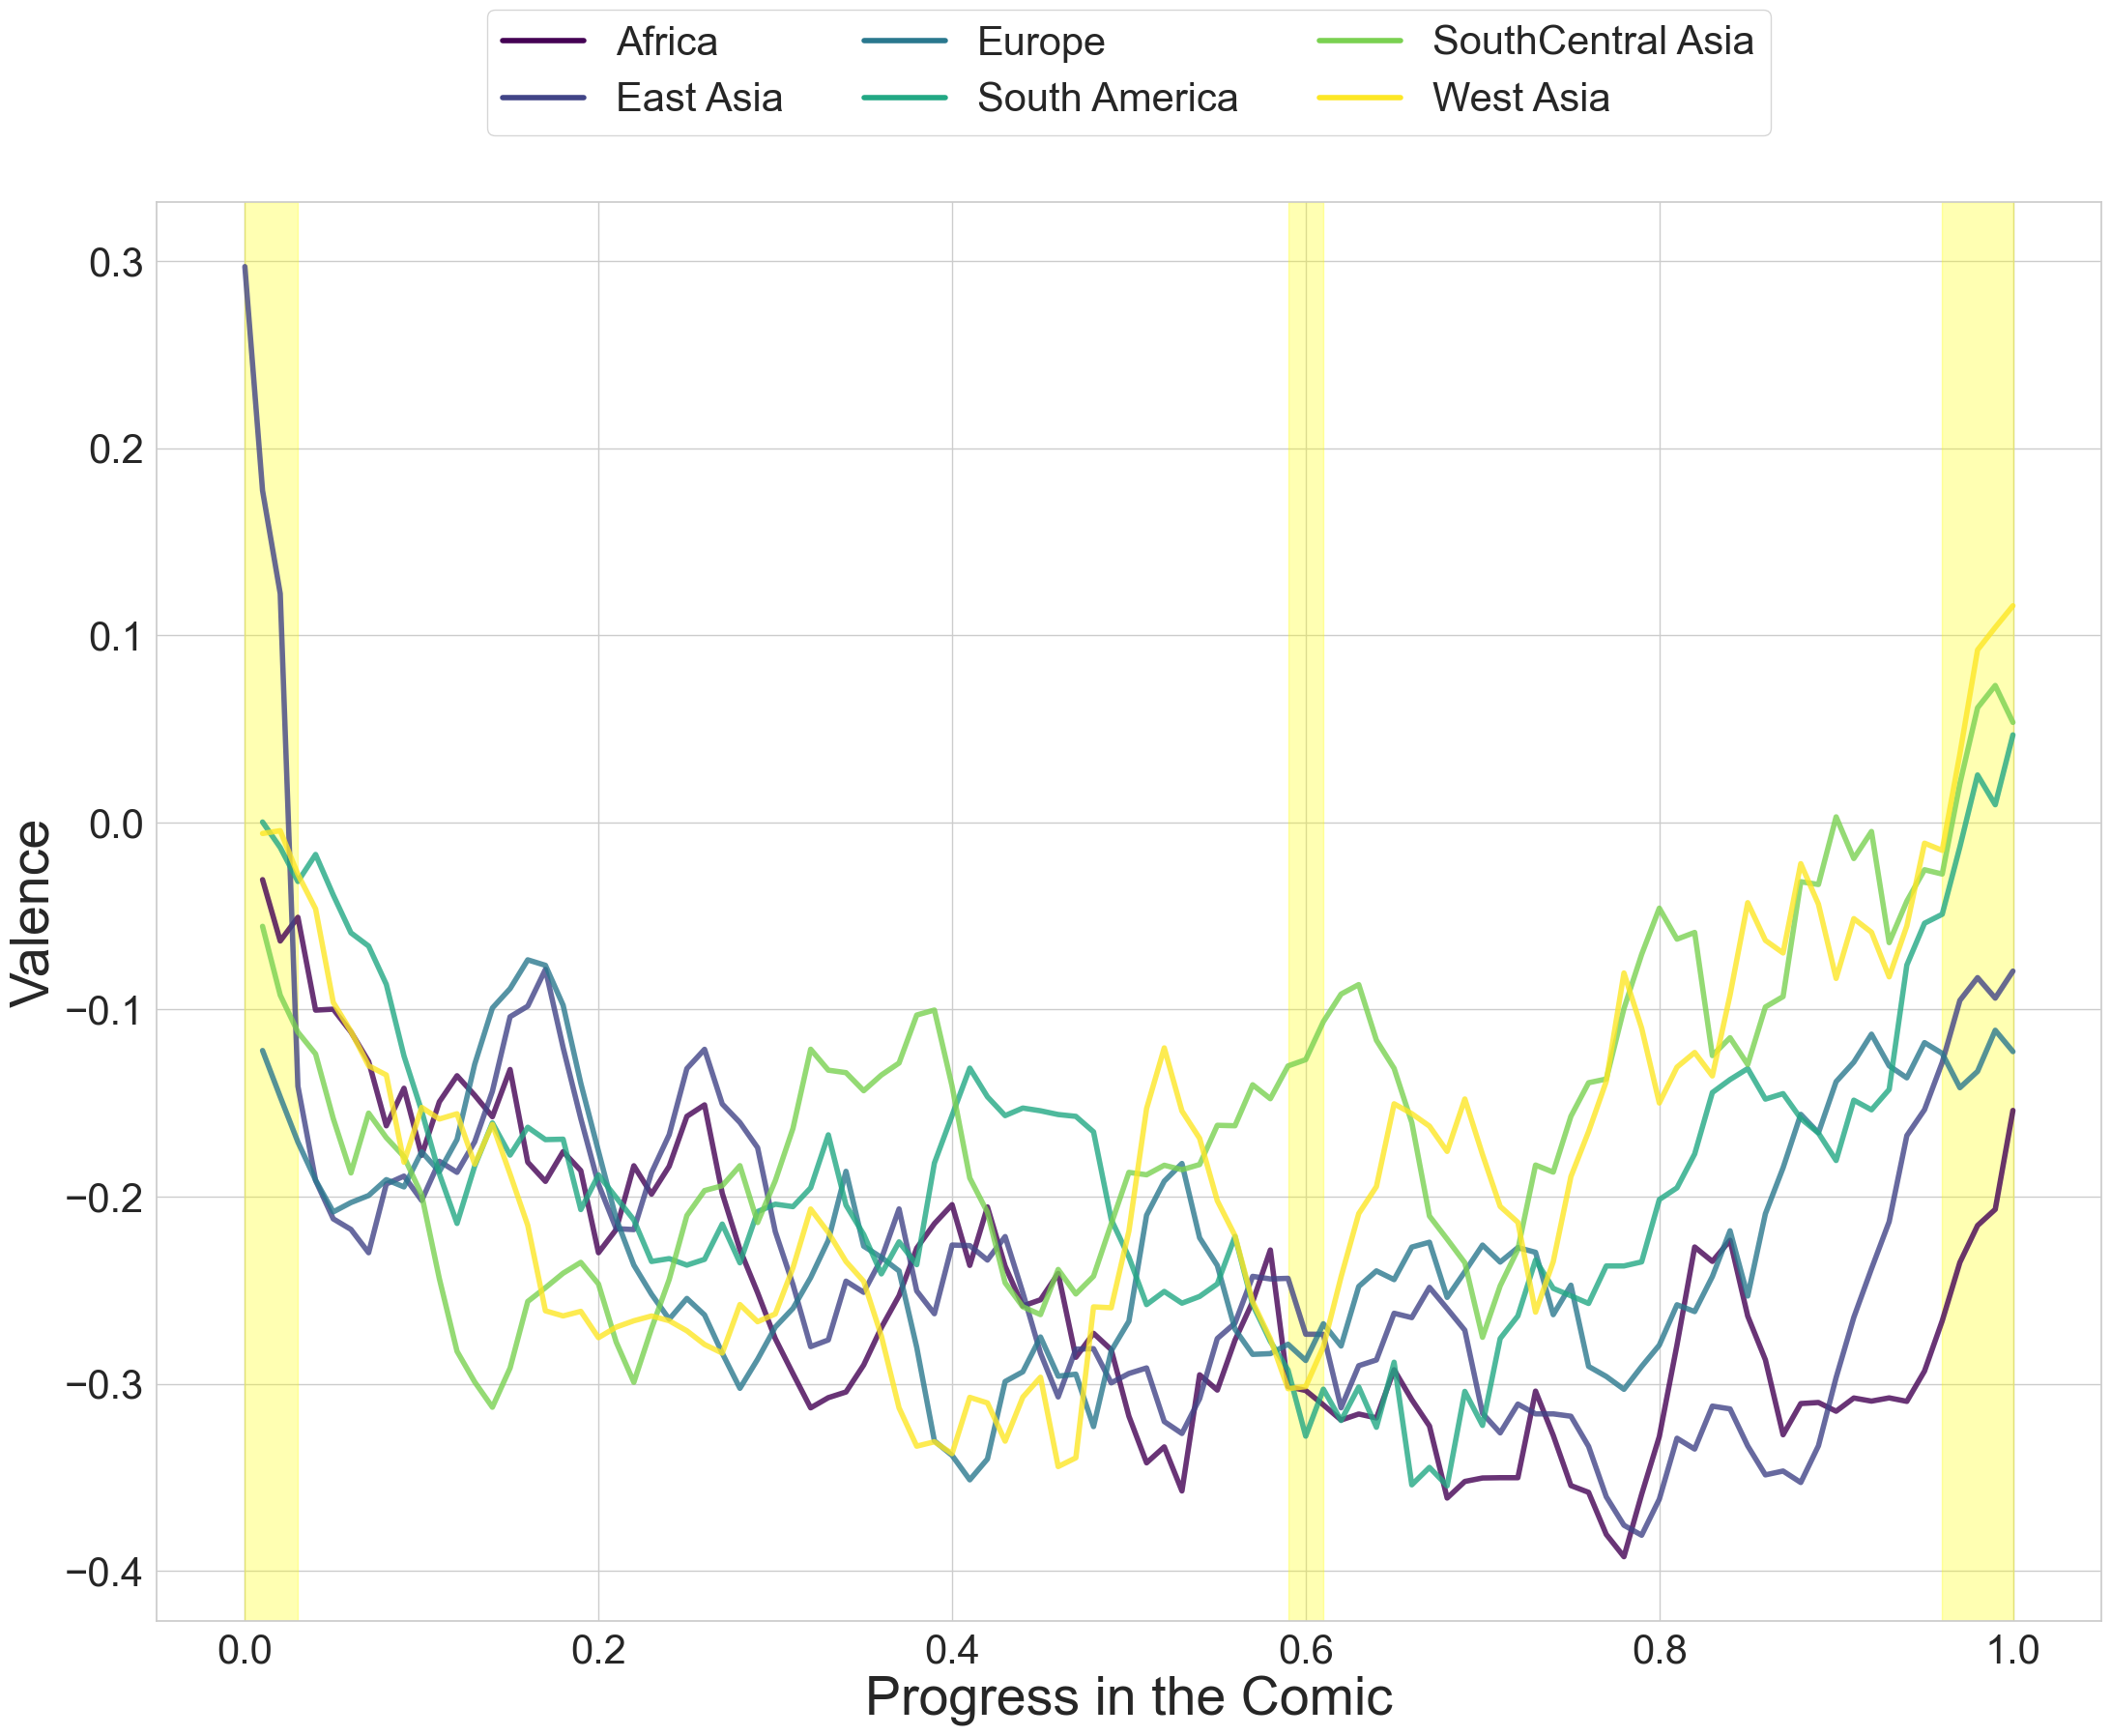

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Set plot style
sns.set(style="whitegrid")

# Use a colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
colors = [cmap(i / 5) for i in range(6)]
region_colors = {
    'Africa': colors[0],
    'East Asia': colors[1],
    'Europe': colors[2],
    'South America': colors[3],
    'SouthCentral Asia': colors[4],
    'West Asia': colors[5]
}

def calculate_metrics(data, value_col, index_col, window):
    mean_valence_by_panel = data.groupby(index_col)[value_col].mean().reset_index()
    mean_valence_by_panel['Valence_SMA'] = mean_valence_by_panel[value_col].rolling(window=window, min_periods=1, center=True).mean()
    return mean_valence_by_panel

# Define the rolling window size
window = 5

# Create plot
fig, ax2 = plt.subplots(figsize=(22, 18))

print("Mean Calculated from SMA Values for Valence")

# Highlight specific regions
highlight_regions = [(0.0, 0.03), (0.59, 0.61), (0.96, 1.0)]  # Narrower middle region width
for start, end in highlight_regions:
    ax2.axvspan(start, end, color='yellow', alpha=0.3)

for region, color in region_colors.items():
    region_data = df_region_sample[df_region_sample['RegionSimplified'] == region]
    mean_valence_by_panel = calculate_metrics(region_data, 'Valence#', 'OrdinalPanel%Rounded2', window)
    
    # Plot SMA line
    ax2.plot(mean_valence_by_panel['OrdinalPanel%Rounded2'], mean_valence_by_panel['Valence_SMA'], color=color, linewidth=4, label=f'{region} SMA (window={window})', alpha=0.8)

# Set up legend
legend_lines = [Line2D([0], [0], color=color, linewidth=4) for color in region_colors.values()]
legend_labels = [f'{region}' for region in region_colors.keys()]

# Position the legend at the upper center
ax2.legend(legend_lines, legend_labels, loc='upper center', fontsize=30, frameon=True, bbox_to_anchor=(0.5, 1.15), ncol=3)

ax2.set_title('', fontsize=40)
ax2.set_xlabel('Progress in the Comic', fontsize=40)
ax2.set_ylabel('Valence', fontsize=40)

ax2.grid(True)
ax2.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()
plt.show()

In [24]:
panel_count = df_region_sample[df_region_sample['Document Name'] == 'A Deal With Lucifer'].shape[0]

print(panel_count)

155


In [25]:
panel_count = df_region_sample[df_region_sample['Document Name'] == 'Fair Friendship'].shape[0]

print(panel_count)

41


In [26]:
panel_count = df_region_sample[df_region_sample['Document Name'] == 'My Friend'].shape[0]

print(panel_count)

135


## **Physical Property**

In [30]:
import pandas as pd
import scipy.stats as stats

# Dictionary to store the results
results = []

# 按RegionSimplified分组
grouped = df_region_sample.groupby('RegionSimplified')

# Group by 'RegionSimplified'
for region, group in grouped:
    # Iterate through each group
    if group['Valence#'].count() > 1 and group['Arousal'].count() > 1:
        
        pearson_corr_arousal = stats.pearsonr(group['Arousal'], group['Relative Area(%)'])
        spearman_corr_arousal = stats.spearmanr(group['Arousal'], group['Relative Area(%)'])
        
        pearson_corr_valence = stats.pearsonr(group['Valence#'], group['Relative Area(%)'])
        spearman_corr_valence = stats.spearmanr(group['Valence#'], group['Relative Area(%)'])
        
        # Store the results
        results.append({
            'RegionSimplified': region,
            'Pearson Correlation (Arousal)': pearson_corr_arousal[0],
            'Pearson p-value (Arousal)': pearson_corr_arousal[1],
            'Spearman Correlation (Arousal)': spearman_corr_arousal.correlation,
            'Spearman p-value (Arousal)': spearman_corr_arousal.pvalue,
            'Pearson Correlation (Valence#)': pearson_corr_valence[0],
            'Pearson p-value (Valence#)': pearson_corr_valence[1],
            'Spearman Correlation (Valence#)': spearman_corr_valence.correlation,
            'Spearman p-value (Valence#)': spearman_corr_valence.pvalue
        })

results_df = pd.DataFrame(results)

print(results_df)

    RegionSimplified  Pearson Correlation (Arousal)  \
0             Africa                       0.133528   
1          East Asia                       0.149001   
2             Europe                       0.095715   
3      South America                       0.214132   
4  SouthCentral Asia                       0.141588   
5          West Asia                       0.193693   

   Pearson p-value (Arousal)  Spearman Correlation (Arousal)  \
0               7.601873e-14                        0.113263   
1               1.364870e-26                        0.167020   
2               2.707635e-10                        0.046791   
3               1.074364e-47                        0.215999   
4               1.786925e-17                        0.105003   
5               4.986964e-30                        0.191600   

   Spearman p-value (Arousal)  Pearson Correlation (Valence#)  \
0                2.385399e-10                        0.025023   
1                4.479792e-33      

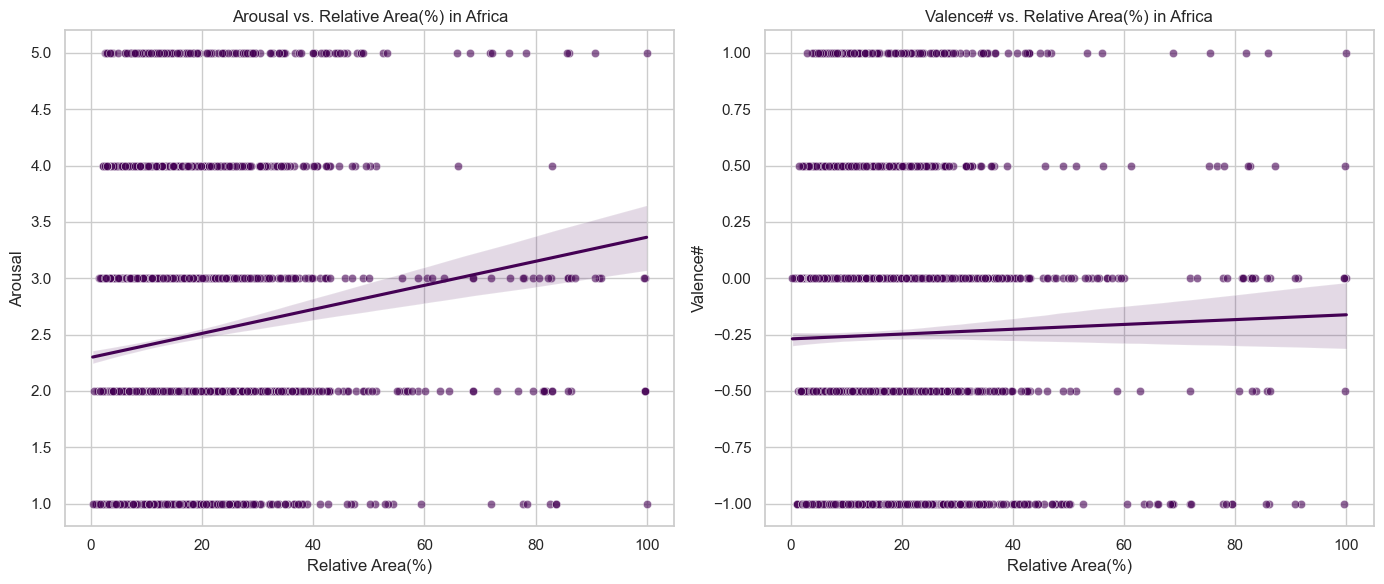

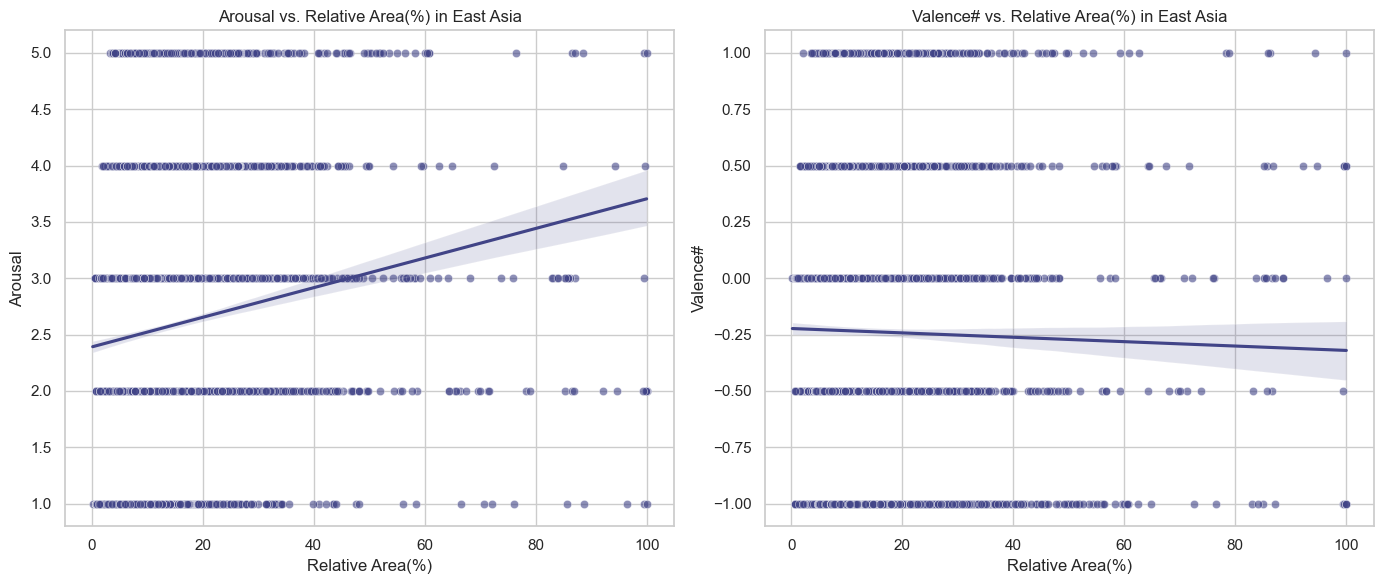

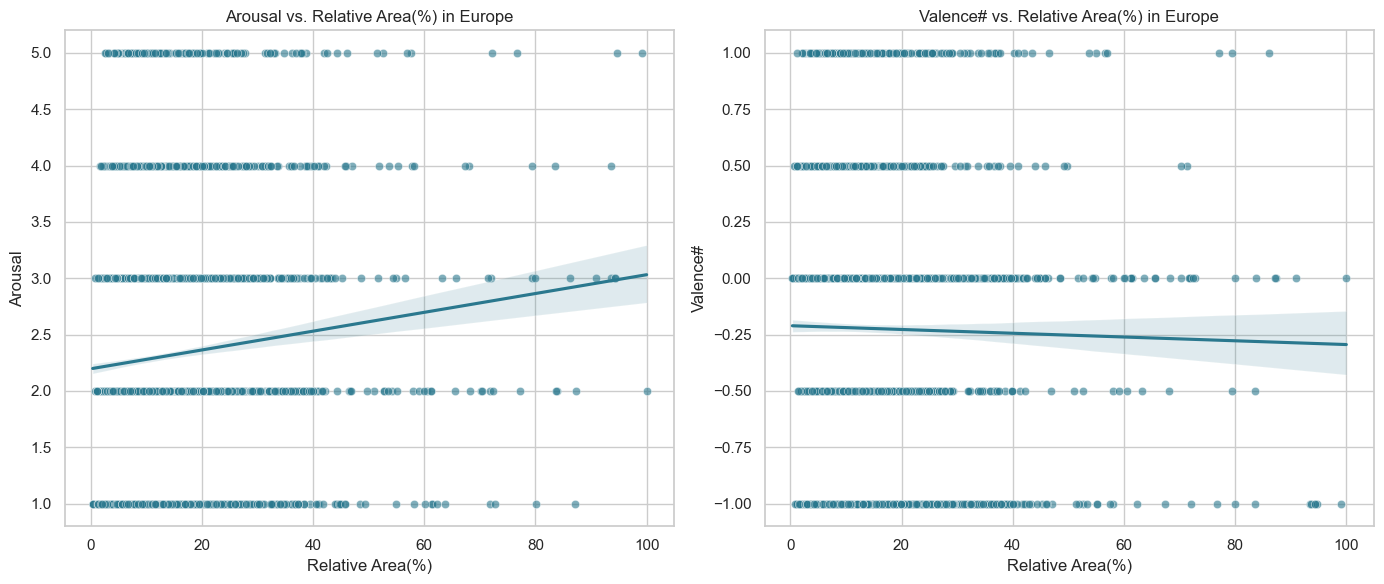

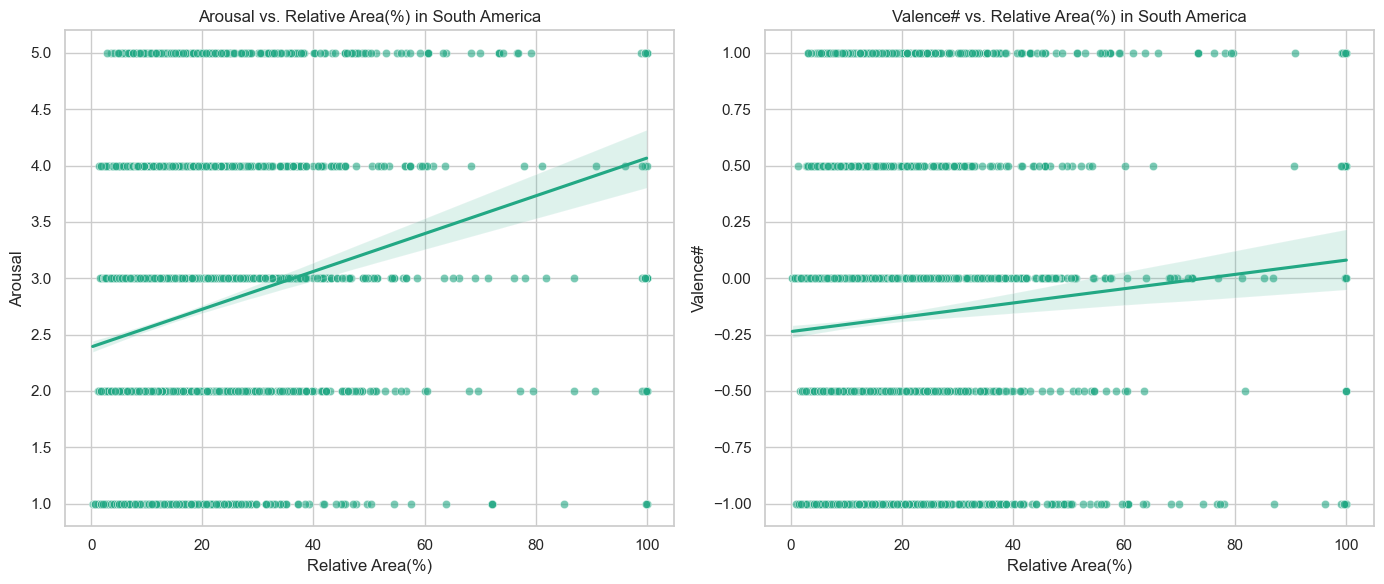

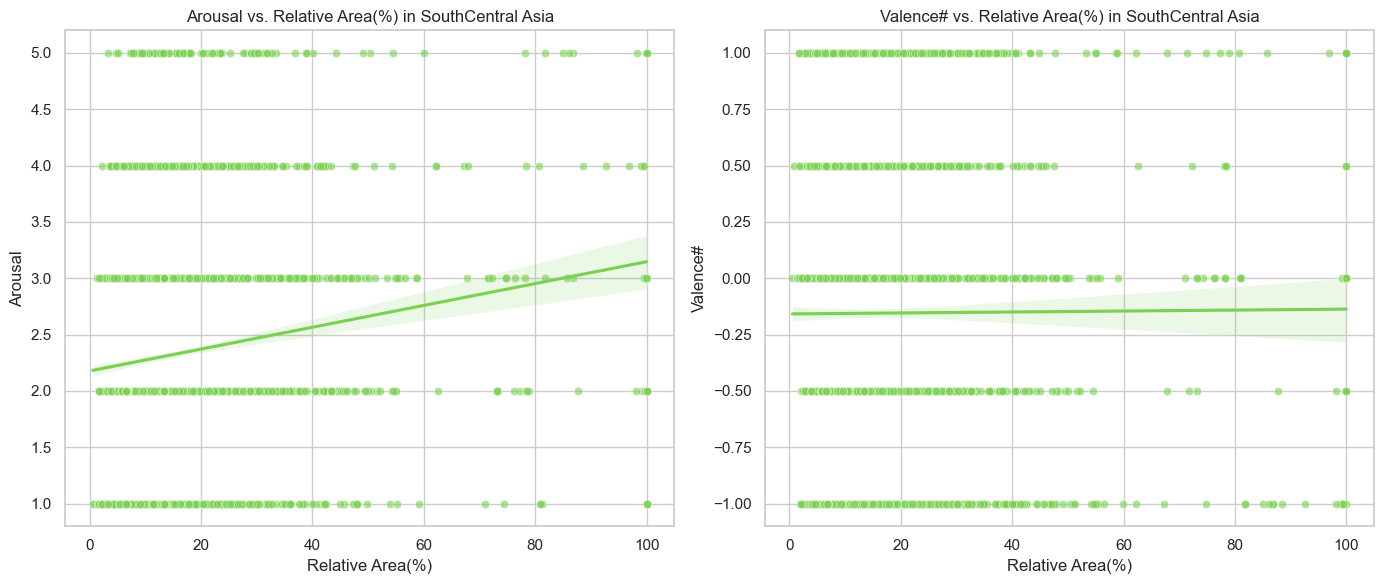

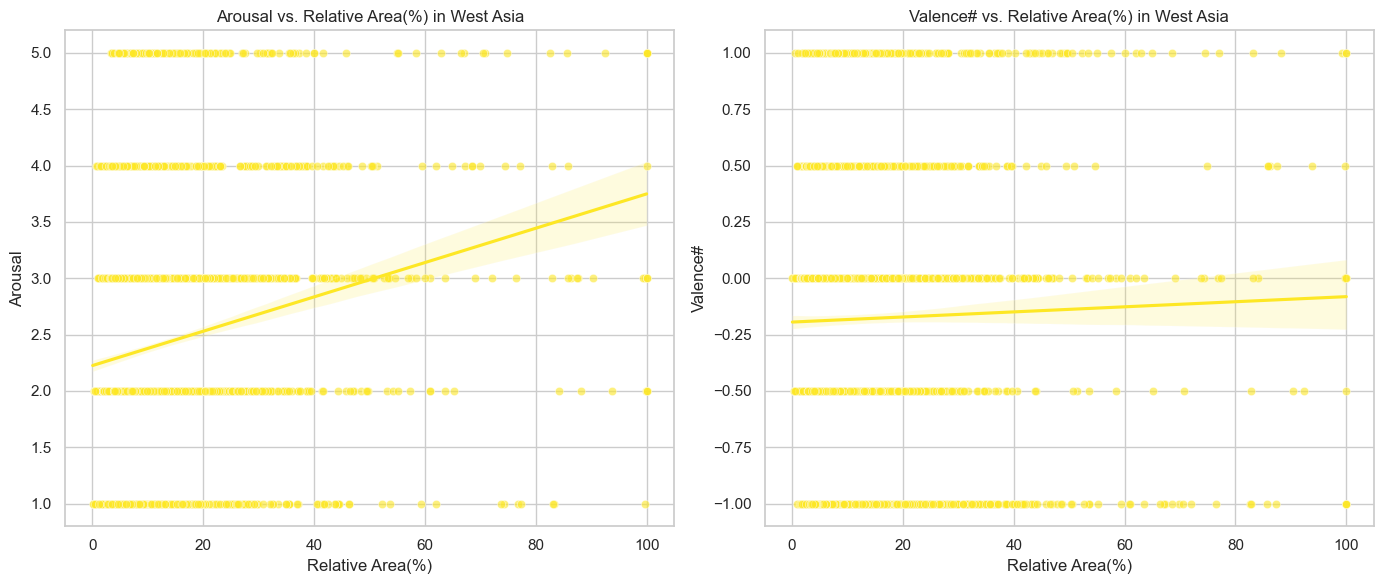

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Use a colorblind-friendly gradient color palette
cmap = plt.colormaps.get_cmap('viridis')
colors = [cmap(i / 5) for i in range(6)]
region_colors = {
    'Africa': colors[0],
    'East Asia': colors[1],
    'Europe': colors[2],
    'South America': colors[3],
    'SouthCentral Asia': colors[4],
    'West Asia': colors[5]
}

# Group by RegionSimplified and create scatter plots
grouped = df_region_sample.groupby('RegionSimplified')

for region, group in grouped:
    if group['Valence#'].count() > 1 and group['Arousal'].count() > 1:
        plt.figure(figsize=(14, 6))
        
        # Arousal vs. Relative Area(%)
        plt.subplot(1, 2, 1)
        color = region_colors.get(region, 'gray')  # Use specified color or gray if not defined
        sns.scatterplot(x='Relative Area(%)', y='Arousal', data=group, color=color, alpha=0.6)
        sns.regplot(x='Relative Area(%)', y='Arousal', data=group, scatter=False, color=color)
        plt.title(f'Arousal vs. Relative Area(%) in {region}')
        plt.xlabel('Relative Area(%)')
        plt.ylabel('Arousal')
        
        # Valence# vs. Relative Area(%)
        plt.subplot(1, 2, 2)
        sns.scatterplot(x='Relative Area(%)', y='Valence#', data=group, color=color, alpha=0.6)
        sns.regplot(x='Relative Area(%)', y='Valence#', data=group, scatter=False, color=color)
        plt.title(f'Valence# vs. Relative Area(%) in {region}')
        plt.xlabel('Relative Area(%)')
        plt.ylabel('Valence#')
        
        plt.tight_layout()
        plt.show()